# portfolio data


In [1]:
import json
import pandas as pd

In [ ]:
# portfolio data
with open('returns_all_year_with_mos.json', 'r') as file:
    data = json.load(file)


In [2]:
# define start dates

# Startdatum für die Berechnung
start_dates = list(data.keys())
print(start_dates)


['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31', '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31', '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31', '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31', '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31', '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31', '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31', '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30', '2017

# get s & p data


In [3]:
import yfinance as yf

sp500_data = yf.download('^GSPC', start='1999-12-31', end='2023-12-31')


print(sp500_data)

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1999-12-31  1464.469971  1472.420044  1458.189941  1469.250000  1469.250000   
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
...                 ...          ...          ...          ...          ...   
2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883  4754.629883   
2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000  4774.750000   
2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078  4781.580078   
2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098

In [4]:
sp500_data_reset = sp500_data.reset_index()
print(sp500_data_reset)

           Date         Open         High          Low        Close  \
0    1999-12-31  1464.469971  1472.420044  1458.189941  1469.250000   
1    2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
2    2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
3    2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
4    2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
...         ...          ...          ...          ...          ...   
6033 2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883   
6034 2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000   
6035 2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078   
6036 2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098   
6037 2023-12-29  4782.879883  4788.430176  4751.990234  4769.830078   

        Adj Close      Volume  
0     1469.250000   374050000  
1     1455.219971   931800000  
2     1399.420044  1009000000  
3     1402.109985  

In [5]:
from datetime import datetime

# also get nearest if not working:


def get_nearest_date(items, pivot):
    if pivot is None:
        return None, None

    # Convert the date strings to datetime objects
    items = [datetime.strptime(date, "%Y-%m-%d") for date in items]
    pivot = datetime.strptime(pivot, "%Y-%m-%d")

    if not items:
        return None, None

    nearest = min(items, key=lambda x: abs(x - pivot))
    timedelta = abs(nearest - pivot)
    return nearest, timedelta


def get_closing_price(target_date: str, df):
    closing_price = None

    for index, row in df.iterrows():
        date_as_str = row['Date'].strftime("%Y-%m-%d")
        if date_as_str == target_date:
            closing_price = row['Adj Close']
            return closing_price

    if closing_price is None:
        print(f'Not exact date for {target_date}')
        # find the nearest closing price
        # dates = df['Date']
        dates = [row['Date'].strftime("%Y-%m-%d") for index, row in df.iterrows()]
        nearest_date, timedelta = get_nearest_date(dates, target_date)

        # Check if nearest_date is None
        if nearest_date is None:
            return None

        # Get closing price of nearest date
        nearest_date_str = nearest_date.strftime("%Y-%m-%d")
        for index, row in df.iterrows():
            if row['Date'].strftime("%Y-%m-%d") == nearest_date_str:

                nearest_closing_price = row['Adj Close']
                return nearest_closing_price
    else:
        return closing_price


In [6]:
sp500_data_quarters_test = {}
for date in start_dates:
    price = get_closing_price(date, sp500_data_reset)
    sp500_data_quarters_test[date] = price

print(sp500_data_quarters_test)

'''
results
sp500_data_quarters = {'2000-03-31': 1498.5799560546875, '2000-06-30': 1454.5999755859375, '2000-09-30': 1436.510009765625, '2000-12-31': 1320.280029296875, '2001-03-31': 1160.3299560546875, '2001-06-30': 1224.3800048828125, '2001-09-30': 1038.550048828125, '2001-12-31': 1148.0799560546875, '2002-03-31': 1146.5400390625, '2002-06-30': 968.6500244140625, '2002-09-30': 815.280029296875, '2002-12-31': 879.8200073242188, '2003-03-31': 848.1799926757812, '2003-06-30': 974.5, '2003-09-30': 995.969970703125, '2003-12-31': 1111.9200439453125, '2004-03-31': 1126.2099609375, '2004-06-30': 1140.8399658203125, '2004-09-30': 1114.5799560546875, '2004-12-31': 1211.9200439453125, '2005-03-31': 1180.5899658203125, '2005-06-30': 1191.3299560546875, '2005-09-30': 1228.81005859375, '2005-12-31': 1248.2900390625, '2006-03-31': 1294.8699951171875, '2006-06-30': 1270.199951171875, '2006-09-30': 1335.8499755859375, '2006-12-31': 1418.300048828125, '2007-03-31': 1420.8599853515625, '2007-06-30': 1503.3499755859375, '2007-09-30': 1547.0400390625, '2007-12-31': 1468.3599853515625, '2008-03-31': 1322.699951171875, '2008-06-30': 1280.0, '2008-09-30': 1166.3599853515625, '2008-12-31': 903.25, '2009-03-31': 797.8699951171875, '2009-06-30': 919.3200073242188, '2009-09-30': 1057.0799560546875, '2009-12-31': 1115.0999755859375, '2010-03-31': 1169.4300537109375, '2010-06-30': 1030.7099609375, '2010-09-30': 1141.199951171875, '2010-12-31': 1257.6400146484375, '2011-03-31': 1325.8299560546875, '2011-06-30': 1320.6400146484375, '2011-09-30': 1131.4200439453125, '2011-12-31': 1257.5999755859375, '2012-03-31': 1408.469970703125, '2012-06-30': 1362.1600341796875, '2012-09-30': 1444.489990234375, '2012-12-31': 1426.18994140625, '2013-03-31': 1562.1700439453125, '2013-06-30': 1614.9599609375, '2013-09-30': 1681.550048828125, '2013-12-31': 1848.3599853515625, '2014-03-31': 1872.3399658203125, '2014-06-30': 1960.22998046875, '2014-09-30': 1972.2900390625, '2014-12-31': 2058.89990234375, '2015-03-31': 2067.889892578125, '2015-06-30': 2063.110107421875, '2015-09-30': 1920.030029296875, '2015-12-31': 2043.93994140625, '2016-03-31': 2059.739990234375, '2016-06-30': 2098.860107421875, '2016-09-30': 2168.27001953125, '2016-12-31': 2238.830078125, '2017-03-31': 2362.719970703125, '2017-06-30': 2423.409912109375, '2017-09-30': 2519.360107421875, '2017-12-31': 2673.610107421875, '2018-03-31': 2640.8701171875, '2018-06-30': 2718.3701171875, '2018-09-30': 2924.590087890625, '2018-12-31': 2506.85009765625, '2019-03-31': 2867.18994140625, '2019-06-30': 2964.330078125, '2019-09-30': 2976.739990234375, '2019-12-31': 3230.780029296875, '2020-03-31': 2584.590087890625, '2020-06-30': 3100.2900390625, '2020-09-30': 3363.0, '2020-12-31': 3756.070068359375, '2021-03-31': 3972.889892578125, '2021-06-30': 4297.5, '2021-09-30': 4307.5400390625, '2021-12-31': 4766.18017578125, '2022-03-31': 4530.41015625, '2022-06-30': 3785.3798828125, '2022-09-30': 3585.6201171875, '2022-12-31': 3839.5, '2023-03-31': 4109.31005859375, '2023-06-30': 4450.3798828125, '2023-09-30': 4288.0498046875, '2023-12-31': 4769.830078125}

'''

Not exact date for 2000-09-30
Not exact date for 2000-12-31
Not exact date for 2001-03-31
Not exact date for 2001-06-30
Not exact date for 2001-09-30
Not exact date for 2002-03-31
Not exact date for 2002-06-30
Not exact date for 2005-12-31
Not exact date for 2006-09-30
Not exact date for 2006-12-31
Not exact date for 2007-03-31
Not exact date for 2007-06-30
Not exact date for 2007-09-30
Not exact date for 2011-12-31
Not exact date for 2012-03-31
Not exact date for 2012-06-30
Not exact date for 2012-09-30
Not exact date for 2013-03-31
Not exact date for 2013-06-30
Not exact date for 2016-12-31
Not exact date for 2017-09-30
Not exact date for 2017-12-31
Not exact date for 2018-03-31
Not exact date for 2018-06-30
Not exact date for 2018-09-30
Not exact date for 2019-03-31
Not exact date for 2019-06-30
Not exact date for 2022-12-31
Not exact date for 2023-09-30
Not exact date for 2023-12-31
{'2000-03-31': 1498.5799560546875, '2000-06-30': 1454.5999755859375, '2000-09-30': 1436.510009765625

"\nresults\nsp500_data_quarters = {'2000-03-31': 1498.5799560546875, '2000-06-30': 1454.5999755859375, '2000-09-30': 1436.510009765625, '2000-12-31': 1320.280029296875, '2001-03-31': 1160.3299560546875, '2001-06-30': 1224.3800048828125, '2001-09-30': 1038.550048828125, '2001-12-31': 1148.0799560546875, '2002-03-31': 1146.5400390625, '2002-06-30': 968.6500244140625, '2002-09-30': 815.280029296875, '2002-12-31': 879.8200073242188, '2003-03-31': 848.1799926757812, '2003-06-30': 974.5, '2003-09-30': 995.969970703125, '2003-12-31': 1111.9200439453125, '2004-03-31': 1126.2099609375, '2004-06-30': 1140.8399658203125, '2004-09-30': 1114.5799560546875, '2004-12-31': 1211.9200439453125, '2005-03-31': 1180.5899658203125, '2005-06-30': 1191.3299560546875, '2005-09-30': 1228.81005859375, '2005-12-31': 1248.2900390625, '2006-03-31': 1294.8699951171875, '2006-06-30': 1270.199951171875, '2006-09-30': 1335.8499755859375, '2006-12-31': 1418.300048828125, '2007-03-31': 1420.8599853515625, '2007-06-30': 1

In [7]:
def calc_return(start, end, data_dict):
    start_value = data_dict[start]
    end_value = data_dict[end]
    return_for_period = (end_value - start_value) / start_value
    return return_for_period

sp_results = {}

for i, start_date in enumerate(start_dates):
    print('Start date:', start_date)

    start_date_results = {}

    for y in range(1, 25):
        if i + y < len(start_dates):
            end_date = start_dates[i + y]
            return_of_period = calc_return(start_date, end_date, sp500_data_quarters_test)
            start_date_results[f'Period {y}'] = return_of_period
        else:
            break

    sp_results[start_date] = start_date_results

print(sp_results)

'''
returns= {'2000-03-31': {'Period 1': -0.029347770394938504, 'Period 2': -0.04141917555902328, 'Period 3': -0.11897925501901337, 'Period 4': -0.22571368223188507, 'Period 5': -0.1829731874258891, 'Period 6': -0.30697721891175134, 'Period 7': -0.2338880875750945, 'Period 8': -0.23491567171297503, 'Period 9': -0.3536213930391622, 'Period 10': -0.45596494467785137, 'Period 11': -0.4128975209033747, 'Period 12': -0.43401085190757166, 'Period 13': -0.3497177137177473, 'Period 14': -0.33539083671903913, 'Period 15': -0.258017538902185, 'Period 16': -0.248481900223413, 'Period 17': -0.2387193214409442, 'Period 18': -0.2562425838197897, 'Period 19': -0.1912876993657814, 'Period 20': -0.2121942102252238, 'Period 21': -0.20502743197559994, 'Period 22': -0.18001701969320402, 'Period 23': -0.16701805998468439, 'Period 24': -0.13593533005326414}, '2000-06-30': {'Period 1': -0.012436385345754976, 'Period 2': -0.09234150181733376, 'Period 3': -0.20230305545874427, 'Period 4': -0.15827029737876114, 'Period 5': -0.2860236035616737, 'Period 6': -0.21072461479162238, 'Period 7': -0.21178326804202355, 'Period 8': -0.3340780691104619, 'Period 9': -0.4395159886012879, 'Period 10': -0.3951464168217022, 'Period 11': -0.41689811156904494, 'Period 12': -0.3300563616416569, 'Period 13': -0.31529631003745107, 'Period 14': -0.23558362257127616, 'Period 15': -0.22575967287236923, 'Period 16': -0.2157019215122956, 'Period 17': -0.23375500153867676, 'Period 18': -0.16683619944574068, 'Period 19': -0.18837482081989526, 'Period 20': -0.1809913542898283, 'Period 21': -0.15522474960941443, 'Period 22': -0.1418327650117912, 'Period 23': -0.10981024553118672, 'Period 24': -0.12677026502752625}, '2000-09-30': {'Period 1': -0.08091136134005332, 'Period 2': -0.19225766046419537, 'Period 3': -0.14767039800677947, 'Period 4': -0.2770325011535628, 'Period 5': -0.20078527246600708, 'Period 6': -0.20185725733330273, 'Period 7': -0.32569211642868856, 'Period 8': -0.43245781529229116, 'Period 9': -0.3875294976414633, 'Period 10': -0.4095551114090971, 'Period 11': -0.3216197636109787, 'Period 12': -0.30667383872554893, 'Period 13': -0.22595732964873058, 'Period 14': -0.2160096669836309, 'Period 15': -0.2058252583938157, 'Period 16': -0.22410568079749216, 'Period 17': -0.15634417045026763, 'Period 18': -0.17815402761242669, 'Period 19': -0.17067758111267187, 'Period 20': -0.14458649766440712, 'Period 21': -0.13102586784886672, 'Period 22': -0.09860008888594302, 'Period 23': -0.11577368585192417, 'Period 24': -0.07007262984273306}, '2000-12-31': {'Period 1': -0.1211485970346534, 'Period 2': -0.07263612437214155, 'Period 3': -0.213386534838967, 'Period 4': -0.13042693172742598, 'Period 5': -0.1315932880745773, 'Period 6': -0.26632986721012186, 'Period 7': -0.3824946138653188, 'Period 8': -0.3336110614406752, 'Period 9': -0.35757568557066954, 'Period 10': -0.2618990075014789, 'Period 11': -0.24563732798902044, 'Period 12': -0.15781499434065224, 'Period 13': -0.14699159576224785, 'Period 14': -0.13591060948799222, 'Period 15': -0.15580033680562042, 'Period 16': -0.08207348664454951, 'Period 17': -0.10580336017879138, 'Period 18': -0.09766872964886156, 'Period 19': -0.06928073489973034, 'Period 20': -0.05452630399379275, 'Period 21': -0.019245942993790344, 'Period 22': -0.037931406227261134, 'Period 23': 0.011792912066809335, 'Period 24': 0.07424184063698312}, '2001-03-31': {'Period 1': 0.05519985801789147, 'Period 2': -0.10495282535032896, 'Period 3': -0.010557341845807387, 'Period 4': -0.011884478996884199, 'Period 5': -0.16519433169886286, 'Period 6': -0.2973722474002472, 'Period 7': -0.2417501567263235, 'Period 8': -0.26901827514672416, 'Period 9': -0.16015268336822044, 'Period 10': -0.14164935111251756, 'Period 11': -0.04172081558074796, 'Period 12': -0.029405424671789988, 'Period 13': -0.016796937916387308, 'Period 14': -0.03942843995475004, 'Period 15': 0.04446156683400623, 'Period 16': 0.01746055909347748, 'Period 17': 0.0267165385485738, 'Period 18': 0.059017783848230636, 'Period 19': 0.07580609511012819, 'Period 20': 0.11594981096580341, 'Period 21': 0.09468857935096628, 'Period 22': 0.15126733444687313, 'Period 23': 0.22232477186970007, 'Period 24': 0.22453098615390393}, '2001-06-30': {'Period 1': -0.1517747393077312, 'Period 2': -0.062317294078506134, 'Period 3': -0.06357500572525496, 'Period 4': -0.20886487810067297, 'Period 5': -0.3341282722312124, 'Period 6': -0.2814158971761158, 'Period 7': -0.30725755950501493, 'Period 8': -0.20408696963875111, 'Period 9': -0.18655158796189997, 'Period 10': -0.09185053699750981, 'Period 11': -0.08017939165439779, 'Period 12': -0.06823048296226934, 'Period 13': -0.0896780806532643, 'Period 14': -0.010176547222112276, 'Period 15': -0.035765072026548834, 'Period 16': -0.026993293500646703, 'Period 17': 0.0036182016149157122, 'Period 18': 0.019528278871212022, 'Period 19': 0.05757198741670215, 'Period 20': 0.037422978247221544, 'Period 21': 0.09104197247470892, 'Period 22': 0.15838223686434091, 'Period 23': 0.16047303915874994, 'Period 24': 0.22784590534849977}, '2001-09-30': {'Period 1': 0.10546425504495756, 'Period 2': 0.1039814983940623, 'Period 3': -0.06730539803347563, 'Period 4': -0.21498243612157406, 'Period 5': -0.15283812434751068, 'Period 6': -0.1833036899542326, 'Period 7': -0.061672568308477324, 'Period 8': -0.040999543712935495, 'Period 9': 0.07064656652799395, 'Period 10': 0.08440605458378087, 'Period 11': 0.09849300677190184, 'Period 12': 0.0732077450791638, 'Period 13': 0.16693465597812454, 'Period 14': 0.13676752232832876, 'Period 15': 0.14710885373213903, 'Period 16': 0.18319772839095222, 'Period 17': 0.20195462940957018, 'Period 18': 0.24680557916133922, 'Period 19': 0.22305126517989018, 'Period 20': 0.28626441941173525, 'Period 21': 0.36565401968687095, 'Period 22': 0.368118933656425, 'Period 23': 0.44754696924070403, 'Period 24': 0.48961529664183534}, '2001-12-31': {'Period 1': -0.0013412976892997405, 'Period 2': -0.1562869647661352, 'Period 3': -0.28987521731627547, 'Period 4': -0.23365963957103567, 'Period 5': -0.26121870850310436, 'Period 6': -0.15119152210546843, 'Period 7': -0.13249075950622807, 'Period 8': -0.03149598764326181, 'Period 9': -0.019049191654161888, 'Period 10': -0.00630617248928796, 'Period 11': -0.02917915239555342, 'Period 12': 0.055605959806151385, 'Period 13': 0.028316851621853784, 'Period 14': 0.03767159227187121, 'Period 15': 0.0703174914894316, 'Period 16': 0.08728493384047818, 'Period 17': 0.12785698268519186, 'Period 18': 0.10636889397219862, 'Period 19': 0.16355134373786226, 'Period 20': 0.23536696320527511, 'Period 21': 0.23759671777065797, 'Period 22': 0.3094471057156294, 'Period 23': 0.3475020018456001, 'Period 24': 0.27897014280912924}, '2002-03-31': {'Period 1': -0.1551537744760263, 'Period 2': -0.28892144929931, 'Period 3': -0.2326303684574088, 'Period 4': -0.26022645195250316, 'Period 5': -0.1500514881304741, 'Period 6': -0.13132560855222533, 'Period 7': -0.030195190693467183, 'Period 8': -0.01773167742281678, 'Period 9': -0.004971543119286372, 'Period 10': -0.027875243706225506, 'Period 11': 0.05702374331058884, 'Period 12': 0.029697983147325895, 'Period 13': 0.03906528814188749, 'Period 14': 0.07175503404008493, 'Period 15': 0.088745265349127, 'Period 16': 0.12937180647958318, 'Period 17': 0.10785485713214946, 'Period 18': 0.1651141085994973, 'Period 19': 0.23702618356689667, 'Period 20': 0.23925893291381933, 'Period 21': 0.31120582305629113, 'Period 22': 0.3493118306862444, 'Period 23': 0.280687926565746, 'Period 24': 0.15364479748427887}, '2002-06-30': {'Period 1': -0.15833375445374215, 'Period 2': -0.09170496552000515, 'Period 3': -0.12436899675004262, 'Period 4': 0.006039307736017616, 'Period 5': 0.028204145563913412, 'Period 6': 0.14790689714576138, 'Period 7': 0.16265930165928164, 'Period 8': 0.17776280087372928, 'Period 9': 0.15065289626033734, 'Period 10': 0.25114335766254103, 'Period 11': 0.21879929392914918, 'Period 12': 0.22988687970696572, 'Period 13': 0.26858001096635353, 'Period 14': 0.288690453311651, 'Period 15': 0.33677795125278176, 'Period 16': 0.31130947107570706, 'Period 17': 0.37908423260918683, 'Period 18': 0.46420276991791365, 'Period 19': 0.46684555777618686, 'Period 20': 0.5520053039747927, 'Period 21': 0.5971093791055302, 'Period 22': 0.5158828765216572, 'Period 23': 0.36550861284701636, 'Period 24': 0.3214266946147794}, '2002-09-30': {'Period 1': 0.0791629571535135, 'Period 2': 0.04035418775960977, 'Period 3': 0.19529482506819365, 'Period 4': 0.22162929903003156, 'Period 5': 0.3638504611774556, 'Period 6': 0.3813780792702373, 'Period 7': 0.3993228397906562, 'Period 8': 0.3671130360152926, 'Period 9': 0.48650770335992805, 'Period 10': 0.448079093558189, 'Period 11': 0.4612524693903402, 'Period 12': 0.5072245295319171, 'Period 13': 0.5311181363525701, 'Period 14': 0.5882518258590573, 'Period 15': 0.557992230310533, 'Period 16': 0.638516739748942, 'Period 17': 0.7396477257652377, 'Period 18': 0.7427876733065081, 'Period 19': 0.8439676204045833, 'Period 20': 0.8975566473727065, 'Period 21': 0.8010498633431824, 'Period 22': 0.622387282456331, 'Period 23': 0.5700126999356468, 'Period 24': 0.4306249919521158}, '2002-12-31': {'Period 1': -0.03596191764797862, 'Period 2': 0.10761291160419262, 'Period 3': 0.13201559684025727, 'Period 4': 0.2638039993281984, 'Period 5': 0.2800458634290697, 'Period 6': 0.2966742701043242, 'Period 7': 0.2668272450912319, 'Period 8': 0.3774636105754219, 'Period 9': 0.3418539655750955, 'Period 10': 0.3540609967234759, 'Period 11': 0.39666073556443504, 'Period 12': 0.41880160563625135, 'Period 13': 0.47174420260713673, 'Period 14': 0.4437043265643753, 'Period 15': 0.5183218890971061, 'Period 16': 0.6120343218172274, 'Period 17': 0.6149439357179421, 'Period 18': 0.7087017379362054, 'Period 19': 0.7583596942373314, 'Period 20': 0.6689322510603732, 'Period 21': 0.5033756224691677, 'Period 22': 0.4548430239644603, 'Period 23': 0.32568022509375844, 'Period 24': 0.0266304385905459}, '2003-03-31': {'Period 1': 0.14893066143391673, 'Period 2': 0.1742436502906722, 'Period 3': 0.31094821093044395, 'Period 4': 0.32779595211224977, 'Period 5': 0.34504465522850547, 'Period 6': 0.31408423410045966, 'Period 7': 0.4288477144126314, 'Period 8': 0.391909707862675, 'Period 9': 0.40457210302303853, 'Period 10': 0.44876095782120795, 'Period 11': 0.4717277580722913, 'Period 12': 0.526645294982989, 'Period 13': 0.4975594356626281, 'Period 14': 0.5749604884827426, 'Period 15': 0.6721687154559816, 'Period 16': 0.6751868679065736, 'Period 17': 0.7724421568154066, 'Period 18': 0.8239525247253263, 'Period 19': 0.7311891320606126, 'Period 20': 0.5594566749907766, 'Period 21': 0.5091136445719994, 'Period 22': 0.3751326315444065, 'Period 23': 0.06492726520285817, 'Period 24': -0.059315237323482664}, '2003-06-30': {'Period 1': 0.022031781121729092, 'Period 2': 0.14101595068785275, 'Period 3': 0.15567979572857876, 'Period 4': 0.1706926278299769, 'Period 5': 0.1437454654229733, 'Period 6': 0.24363267721427656, 'Period 7': 0.21148277662423037, 'Period 8': 0.2225038030320036, 'Period 9': 0.26096465735633656, 'Period 10': 0.28095437564135456, 'Period 11': 0.3287532017621216, 'Period 12': 0.3034376102328117, 'Period 13': 0.37080551625032065, 'Period 14': 0.4554130824300924, 'Period 15': 0.45804000549159823, 'Period 16': 0.5426885331820805, 'Period 17': 0.5875218461390457, 'Period 18': 0.5067829505916496, 'Period 19': 0.3573113916591842, 'Period 20': 0.3134940995382247, 'Period 21': 0.19688043648184966, 'Period 22': -0.07311441765007697, 'Period 23': -0.18125192907420473, 'Period 24': -0.05662390218140713}, '2003-09-30': {'Period 1': 0.11641924621515468, 'Period 2': 0.13076698501504966, 'Period 3': 0.1454561878154957, 'Period 4': 0.11908992122305394, 'Period 5': 0.21682387983016518, 'Period 6': 0.18536702967746238, 'Period 7': 0.1961504775225745, 'Period 8': 0.23378223715545043, 'Period 9': 0.2533410401733745, 'Period 10': 0.30010947438811636, 'Period 11': 0.27533960715216327, 'Period 12': 0.3412552736332677, 'Period 13': 0.42403896758739384, 'Period 14': 0.4266092624745281, 'Period 15': 0.5094330349384102, 'Period 16': 0.5532998830982183, 'Period 17': 0.4743014634416581, 'Period 18': 0.32805203980004377, 'Period 19': 0.28517931027213433, 'Period 20': 0.17107946992432638, 'Period 21': -0.09309514687241773, 'Period 22': -0.19890155467848578, 'Period 23': -0.07696011489663054, 'Period 24': 0.06135725689442291}, '2003-12-31': {'Period 1': 0.012851568842561776, 'Period 2': 0.026008994111111076, 'Period 3': 0.002392179297296508, 'Period 4': 0.08993452410946762, 'Period 5': 0.06175796744462445, 'Period 6': 0.0714169265513129, 'Period 7': 0.10512447840555926, 'Period 8': 0.1226437061367468, 'Period 9': 0.16453516794492914, 'Period 10': 0.14234828132511582, 'Period 11': 0.20139031835965224, 'Period 12': 0.27554139935792105, 'Period 13': 0.27784366608777905, 'Period 14': 0.3520306462430105, 'Period 15': 0.3913230969137813, 'Period 16': 0.32056256503977615, 'Period 17': 0.18956390648258634, 'Period 18': 0.1511619086011855, 'Period 19': 0.048960302229183954, 'Period 20': -0.18766641098123374, 'Period 21': -0.2824394168791249, 'Period 22': -0.173213926369841, 'Period 23': -0.04932017206564737, 'Period 24': 0.00285985638800248}, '2004-03-31': {'Period 1': 0.012990477255798667, 'Period 2': -0.010326675563348101, 'Period 3': 0.07610488805876318, 'Period 4': 0.04828584968076869, 'Period 5': 0.05782225106851225, 'Period 6': 0.09110210459410409, 'Period 7': 0.10839903957462417, 'Period 8': 0.14975896149887405, 'Period 9': 0.12785359322742293, 'Period 10': 0.18614647527528985, 'Period 11': 0.2593566901570273, 'Period 12': 0.26162974457159355, 'Period 13': 0.3348754031037799, 'Period 14': 0.3736692914478265, 'Period 15': 0.3038066047020609, 'Period 16': 0.17447012284530786, 'Period 17': 0.1365553887789088, 'Period 18': 0.0356505676620371, 'Period 19': -0.1979737070980083, 'Period 20': -0.29154418555043665, 'Period 21': -0.183704602862026, 'Period 22': -0.061382874668650646, 'Period 23': -0.009864932594197734, 'Period 24': 0.038376585425917785}, '2004-06-30': {'Period 1': -0.0230181362438008, 'Period 2': 0.062305038615902975, 'Period 3': 0.03484274849314037, 'Period 4': 0.04425685612974695, 'Period 5': 0.07710993251378888, 'Period 6': 0.09418505352319624, 'Period 7': 0.1350145804070958, 'Period 8': 0.11339012414291356, 'Period 9': 0.17093546475241556, 'Period 10': 0.24320683997803924, 'Period 11': 0.24545074499551187, 'Period 12': 0.3177571093461517, 'Period 13': 0.3560535091791883, 'Period 14': 0.2870867337608997, 'Period 15': 0.15940884856781593, 'Period 16': 0.12198032883571493, 'Period 17': 0.022369499926223238, 'Period 18': -0.2082588031087035, 'Period 19': -0.3006293441486466, 'Period 20': -0.19417268427900092, 'Period 21': -0.07341959632821768, 'Period 22': -0.02256231461515012, 'Period 23': 0.02506055954137924, 'Period 24': -0.09653413991648192}, '2004-09-30': {'Period 1': 0.08733342759471709, 'Period 2': 0.05922411344923395, 'Period 3': 0.06886002173560908, 'Period 4': 0.10248713151401562, 'Period 5': 0.11996455012622885, 'Period 6': 0.16175603919944706, 'Period 7': 0.13962210092853305, 'Period 8': 0.1985232358874335, 'Period 9': 0.2724973575233891, 'Period 10': 0.2747941299617694, 'Period 11': 0.34880406508241096, 'Period 12': 0.38800274548144986, 'Period 13': 0.3174110815245242, 'Period 14': 0.18672504739263046, 'Period 15': 0.14841469474370853, 'Period 16': 0.04645698948343046, 'Period 17': -0.18960502107245725, 'Period 18': -0.28415185399400855, 'Period 19': -0.17518702688826052, 'Period 20': -0.05158894136544003, 'Period 21': 0.000466560993157215, 'Period 22': 0.04921145168481637, 'Period 23': -0.07524807409426656, 'Period 24': 0.023883432473893667}, '2004-12-31': {'Period 1': -0.025851604882288555, 'Period 2': -0.01698964217440909, 'Period 3': 0.013936575051150533, 'Period 4': 0.030010226581274932, 'Period 5': 0.0684450691168023, 'Period 6': 0.04808890447659958, 'Period 7': 0.10225916491749788, 'Period 8': 0.17029176628761603, 'Period 9': 0.1724040644843715, 'Period 10': 0.2404696028393897, 'Period 11': 0.2765198882479327, 'Period 12': 0.21159806926819155, 'Period 13': 0.09140859397450597, 'Period 14': 0.05617528680609856, 'Period 15': -0.03759328746262231, 'Period 16': -0.2546950564003058, 'Period 17': -0.34164799146337815, 'Period 18': -0.24143509968574894, 'Period 19': -0.12776427674762686, 'Period 20': -0.07988981520941325, 'Period 21': -0.03506006064232761, 'Period 22': -0.14952313390072913, 'Period 23': -0.05835376114682754, 'Period 24': 0.037725236851671465}, '2005-03-31': {'Period 1': 0.009097138333640252, 'Period 2': 0.04084406455202472, 'Period 3': 0.05734427295013242, 'Period 4': 0.09679908571598735, 'Period 5': 0.07590271639256103, 'Period 6': 0.13151052800770272, 'Period 7': 0.20134855444298458, 'Period 8': 0.2035169080607106, 'Period 9': 0.2733887455509253, 'Period 10': 0.31039572065782045, 'Period 11': 0.24375102945356475, 'Period 12': 0.12037200845834721, 'Period 13': 0.08420369227059639, 'Period 14': -0.012053279191529079, 'Period 15': -0.23491641793483112, 'Period 16': -0.32417687917345517, 'Period 17': -0.22130457318816432, 'Period 18': -0.1046171942345844, 'Period 19': -0.05547225720224584, 'Period 20': -0.009452826495624777, 'Period 21': -0.12695348022771902, 'Period 22': -0.03336468696908501, 'Period 23': 0.06526402142897099, 'Period 24': 0.12302322943551151}, '2005-06-30': {'Period 1': 0.03146072366314441, 'Period 2': 0.04781218059558117, 'Period 3': 0.0869113032340698, 'Period 4': 0.06620331732308678, 'Period 5': 0.12130981748318924, 'Period 6': 0.19051824527697728, 'Period 7': 0.19266705091258404, 'Period 8': 0.26190898495036824, 'Period 9': 0.29858233749599744, 'Period 10': 0.23253845661223183, 'Period 11': 0.11027171309638169, 'Period 12': 0.07442945885366635, 'Period 13': -0.020959743836055075, 'Period 14': -0.24181374319564522, 'Period 15': -0.33026951008645533, 'Period 16': -0.22832461095100864, 'Period 17': -0.11268918347742556, 'Period 18': -0.06398729426833173, 'Period 19': -0.018382734550112072, 'Period 20': -0.13482410502721742, 'Period 21': -0.042079026577009286, 'Period 22': 0.05566053154018572, 'Period 23': 0.11289903298110791, 'Period 24': 0.10854260646813961}, '2005-09-30': {'Period 1': 0.01585271892308799, 'Period 2': 0.053759273910108187, 'Period 3': 0.03368290509071157, 'Period 4': 0.08710859440285178, 'Period 5': 0.1542060865380833, 'Period 6': 0.1562893511610691, 'Period 7': 0.2234193275617966, 'Period 8': 0.2589741011991164, 'Period 9': 0.19494463369868031, 'Period 10': 0.07640716473754501, 'Period 11': 0.041658139960891724, 'Period 12': -0.05082158369834257, 'Period 13': -0.26493928521900356, 'Period 14': -0.3506970507465818, 'Period 15': -0.2518615868295476, 'Period 16': -0.13975317123916645, 'Period 17': -0.09253674496930982, 'Period 18': -0.0483231761227337, 'Period 19': -0.16121295253959406, 'Period 20': -0.07129670432722206, 'Period 21': 0.02346168624928127, 'Period 22': 0.0789543483815286, 'Period 23': 0.07473079782548141, 'Period 24': -0.07925554805426203}, '2005-12-31': {'Period 1': 0.03731501061217337, 'Period 2': 0.017551940193186146, 'Period 3': 0.07014390388727079, 'Period 4': 0.13619431738260698, 'Period 5': 0.13824507196954583, 'Period 6': 0.20432746280263078, 'Period 7': 0.23932739239381373, 'Period 8': 0.17629712599031958, 'Period 9': 0.05960947358456764, 'Period 10': 0.025402718875586837, 'Period 11': -0.0656338279943892, 'Period 12': -0.27641015169970795, 'Period 13': -0.3608296388262381, 'Period 14': -0.26353653513517317, 'Period 15': -0.15317760858799812, 'Period 16': -0.10669801032506186, 'Period 17': -0.06317440889842277, 'Period 18': -0.17430250287698248, 'Period 19': -0.08578942756849409, 'Period 20': 0.007490226865031774, 'Period 21': 0.06211690758216905, 'Period 22': 0.057959266934689564, 'Period 23': -0.09362407089698487, 'Period 24': 0.007458151737259329}, '2006-03-31': {'Period 1': -0.01905213962663474, 'Period 2': 0.031647949696325506, 'Period 3': 0.09532235218699844, 'Period 4': 0.09729933561629307, 'Period 5': 0.1610045651338784, 'Period 6': 0.19474545313137073, 'Period 7': 0.13398255491947972, 'Period 8': 0.02149247118215049, 'Period 9': -0.011483774566760075, 'Period 10': -0.09924549201867533, 'Period 11': -0.3024396245136141, 'Period 12': -0.3838223156565002, 'Period 13': -0.290029106558285, 'Period 14': -0.18364008739037904, 'Period 15': -0.1388324852758524, 'Period 16': -0.09687454484177581, 'Period 17': -0.2040050624200159, 'Period 18': -0.11867604047107845, 'Period 19': -0.02875190606712656, 'Period 20': 0.023909706035545354, 'Period 21': 0.01990162690341572, 'Period 22': -0.1262288506091166, 'Period 23': -0.028782827366292483, 'Period 24': 0.08773079615274933}, '2006-06-30': {'Period 1': 0.051684795258805025, 'Period 2': 0.11659589304787343, 'Period 3': 0.11861127379251582, 'Period 4': 0.18355379733636457, 'Period 5': 0.21795000671761547, 'Period 6': 0.15600696094883867, 'Period 7': 0.041332075278041044, 'Period 8': 0.007715359159857913, 'Period 9': -0.08175088160294029, 'Period 10': -0.28889148581160806, 'Period 11': -0.37185480570906976, 'Period 12': -0.27623992862221225, 'Period 13': -0.1677846034559873, 'Period 14': -0.12210674031505328, 'Period 15': -0.07933388547839898, 'Period 16': -0.18854511056580006, 'Period 17': -0.10155881354032943, 'Period 18': -0.009888156988078779, 'Period 19': 0.04379625808636566, 'Period 20': 0.039710333345570475, 'Period 21': -0.10925831566795874, 'Period 22': -0.009919678846084726, 'Period 23': 0.10885689249451107, 'Period 24': 0.07239811568483447}, '2006-09-30': {'Period 1': 0.061721057565631815, 'Period 2': 0.06363739291033596, 'Period 3': 0.1253883318196194, 'Period 4': 0.158094147798243, 'Period 5': 0.0991952780532131, 'Period 6': -0.009843938057710834, 'Period 7': -0.041808568781415964, 'Period 8': -0.12687801274992158, 'Period 9': -0.3238387419936047, 'Period 10': -0.40272484957210736, 'Period 11': -0.31180894252666225, 'Period 12': -0.2086836281214696, 'Period 13': -0.16525059253242377, 'Period 14': -0.12457979931616499, 'Period 15': -0.22842386512347346, 'Period 16': -0.1457124886562835, 'Period 17': -0.0585469643798849, 'Period 18': -0.007500856918348908, 'Period 19': -0.01138597987459522, 'Period 20': -0.15303360061144355, 'Period 21': -0.058576937103792345, 'Period 22': 0.05436238832533162, 'Period 23': 0.01969536929639853, 'Period 24': 0.08132650869030802}, '2006-12-31': {'Period 1': 0.0018049329727885548, 'Period 2': 0.059966102961136664, 'Period 3': 0.0907706308977052, 'Period 4': 0.03529573066347962, 'Period 5': -0.0674047058908585, 'Period 6': -0.09751113591400908, 'Period 7': -0.17763523570680886, 'Period 8': -0.3631460418080693, 'Period 9': -0.4374462612643706, 'Period 10': -0.351815570983157, 'Period 11': -0.25468524313448115, 'Period 12': -0.21377710132119612, 'Period 13': -0.17547062437374739, 'Period 14': -0.2732779204307809, 'Period 15': -0.19537480654055173, 'Period 16': -0.11327647793034581, 'Period 17': -0.06519783514767641, 'Period 18': -0.06885710415111346, 'Period 19': -0.20227032010599452, 'Period 20': -0.11330470824912292, 'Period 21': -0.006930887531959216, 'Period 22': -0.03958260785143691, 'Period 23': 0.01846572692984783, 'Period 24': 0.005562922023900407}, '2007-03-31': {'Period 1': 0.05805638210999696, 'Period 2': 0.0888054101120434, 'Period 3': 0.03343045795483297, 'Period 4': -0.0690849451681897, 'Period 5': -0.09913713300660627, 'Period 6': -0.17911687472642085, 'Period 7': -0.3642934495220446, 'Period 8': -0.4384598036802542, 'Period 9': -0.35298339259180983, 'Period 10': -0.25602806261509653, 'Period 11': -0.21519362422608515, 'Period 12': -0.17695616333259878, 'Period 13': -0.274587241836871, 'Period 14': -0.19682448451139356, 'Period 15': -0.11487407090483978, 'Period 16': -0.06688205050222579, 'Period 17': -0.07053472667000868, 'Period 18': -0.20370757456065178, 'Period 19': -0.11490225036158624, 'Period 20': -0.008720081342407463, 'Period 21': -0.04131297367583401, 'Period 22': 0.01663077652015497, 'Period 23': 0.00375121835341764, 'Period 24': 0.09945389415607038}, '2007-06-30': {'Period 1': 0.029061804760088614, 'Period 2': -0.023274680415475108, 'Period 3': -0.12016498310292208, 'Period 4': -0.1485681838647623, 'Period 5': -0.22415937453488274, 'Period 6': -0.39917516568425515, 'Period 7': -0.4692719539199686, 'Period 8': -0.3884857004331878, 'Period 9': -0.2968503853251564, 'Period 10': -0.25825656454258283, 'Period 11': -0.2221172230670062, 'Period 12': -0.31439120785180036, 'Period 13': -0.24089535390647335, 'Period 14': -0.16344162365901088, 'Period 15': -0.11808296299207426, 'Period 16': -0.12153521395860466, 'Period 17': -0.24740076341549386, 'Period 18': -0.16346825688690209, 'Period 19': -0.06311238661897911, 'Period 20': -0.0939168814308994, 'Period 21': -0.039152550176229955, 'Period 22': -0.051325396902084645, 'Period 23': 0.039125998147204286, 'Period 24': 0.07424085353649074}, '2007-09-30': {'Period 1': -0.05085844692075151, 'Period 2': -0.14501246394797523, 'Period 3': -0.1726135279758662, 'Period 4': -0.24606994266394558, 'Period 5': -0.41614310089390716, 'Period 6': -0.48426028094224793, 'Period 7': -0.4057555175615733, 'Period 8': -0.31670808165037945, 'Period 9': -0.2792041915982449, 'Period 10': -0.24408546373524542, 'Period 11': -0.33375353260921026, 'Period 12': -0.26233328009827234, 'Period 13': -0.18706692594035107, 'Period 14': -0.14298924230937482, 'Period 15': -0.14634399802041323, 'Period 16': -0.2686549698927324, 'Period 17': -0.1870928070174331, 'Period 18': -0.08957109374062995, 'Period 19': -0.11950563670921474, 'Period 20': -0.06628790867641016, 'Period 21': -0.07811698120591931, 'Period 22': 0.00977996981382668, 'Period 23': 0.043903144172118, 'Period 24': 0.08694668939993144}, '2007-12-31': {'Period 1': -0.09919913075322112, 'Period 2': -0.12827915989992356, 'Period 3': -0.20567163571111177, 'Period 4': -0.38485793060906714, 'Period 5': -0.45662507622328236, 'Period 6': -0.37391374288634655, 'Period 7': -0.2800948223867624, 'Period 8': -0.24058133788019676, 'Period 9': -0.20358082120376877, 'Period 10': -0.2980536304312856, 'Period 11': -0.22280642175178664, 'Period 12': -0.14350702334936846, 'Period 13': -0.0970674975610628, 'Period 14': -0.10060201325069282, 'Period 15': -0.2294668506140053, 'Period 16': -0.14353429122843042, 'Period 17': -0.0407870108460483, 'Period 18': -0.07232555519854217, 'Period 19': -0.016256228278702663, 'Period 20': -0.028719145418019495, 'Period 21': 0.06388764303686027, 'Period 22': 0.09983926084095636, 'Period 23': 0.14518923533967007, 'Period 24': 0.25879212440471017}, '2008-03-31': {'Period 1': -0.032282416835385866, 'Period 2': -0.11819760459036811, 'Period 3': -0.3171164789113768, 'Period 4': -0.3967868567544007, 'Period 5': -0.30496708152916535, 'Period 6': -0.20081651540234477, 'Period 7': -0.15695167706176277, 'Period 8': -0.11587654276780208, 'Period 9': -0.2207530059827099, 'Period 10': -0.1372193291752949, 'Period 11': -0.049187222291643865, 'Period 12': 0.0023663755941318388, 'Period 13': -0.0015573724952605116, 'Period 14': -0.14461322619471928, 'Period 15': -0.0492174929985147, 'Period 16': 0.06484465313184609, 'Period 17': 0.029832981374840133, 'Period 18': 0.09207684551178628, 'Period 19': 0.07824147127448351, 'Period 20': 0.1810464214210288, 'Period 21': 0.22095714867660715, 'Period 22': 0.2713012103299156, 'Period 23': 0.39741442018952783, 'Period 24': 0.4155439895204289}, '2008-06-30': {'Period 1': -0.08878126144409179, 'Period 2': -0.2943359375, 'Period 3': -0.3766640663146973, 'Period 4': -0.2817812442779541, 'Period 5': -0.1741562843322754, 'Period 6': -0.12882814407348633, 'Period 7': -0.08638277053833007, 'Period 8': -0.19475784301757812, 'Period 9': -0.10843753814697266, 'Period 10': -0.017468738555908202, 'Period 11': 0.03580465316772461, 'Period 12': 0.0317500114440918, 'Period 13': -0.1160780906677246, 'Period 14': -0.017500019073486327, 'Period 15': 0.10036716461181641, 'Period 16': 0.06418752670288086, 'Period 17': 0.12850780487060548, 'Period 18': 0.11421089172363282, 'Period 19': 0.2204453468322754, 'Period 20': 0.2616874694824219, 'Period 21': 0.31371097564697265, 'Period 22': 0.4440312385559082, 'Period 23': 0.46276559829711916, 'Period 24': 0.531429672241211}, '2008-09-30': {'Period 1': -0.2255821432970853, 'Period 2': -0.3159316119056548, 'Period 3': -0.21180422950885214, 'Period 4': -0.09369322565017178, 'Period 5': -0.04394870401025828, 'Period 6': 0.002632179085301546, 'Period 7': -0.11630202177518553, 'Period 8': -0.021571414053701266, 'Period 9': 0.07826059745127617, 'Period 10': 0.13672448704167248, 'Period 11': 0.13227479614741083, 'Period 12': -0.029956395834103016, 'Period 13': 0.07822626923099868, 'Period 14': 0.20757741039837377, 'Period 15': 0.16787274193833668, 'Period 16': 0.23845983090630374, 'Period 17': 0.22276995037374325, 'Period 18': 0.3393549706478018, 'Period 19': 0.384615368513968, 'Period 20': 0.4417075945221789, 'Period 21': 0.5847251350914894, 'Period 22': 0.6052848085798782, 'Period 23': 0.6806389151612573, 'Period 24': 0.6909788262909373}, '2008-12-31': {'Period 1': -0.11666759466682812, 'Period 2': 0.017791317270101022, 'Period 3': 0.17030717526120953, 'Period 4': 0.23454190488340715, 'Period 5': 0.29469145165893995, 'Period 6': 0.1411126055217271, 'Period 7': 0.2634375324349571, 'Period 8': 0.39234986398941324, 'Period 9': 0.46784384838603654, 'Period 10': 0.4620979957358843, 'Period 11': 0.2526100680269167, 'Period 12': 0.39230553621471076, 'Period 13': 0.5593356996436479, 'Period 14': 0.5080653575197205, 'Period 15': 0.599213938814697, 'Period 16': 0.5789537131538888, 'Period 17': 0.7294990799283836, 'Period 18': 0.7879434939800719, 'Period 19': 0.8616662594277609, 'Period 20': 1.0463437424318434, 'Period 21': 1.0728922954002906, 'Period 22': 1.170196490970108, 'Period 23': 1.183548341060061, 'Period 24': 1.2794352641502906}, '2009-03-31': {'Period 1': 0.15221779606988883, 'Period 2': 0.3248774393370043, 'Period 3': 0.39759607756919935, 'Period 4': 0.4656899756446875, 'Period 5': 0.2918269483064268, 'Period 6': 0.4303081431258244, 'Period 7': 0.5762467849962463, 'Period 8': 0.6617117627790423, 'Period 9': 0.6552070170961473, 'Period 10': 0.41805062337146126, 'Period 11': 0.5761966025570706, 'Period 12': 0.765287552261262, 'Period 13': 0.707245594540273, 'Period 14': 0.8104327761093647, 'Period 15': 0.7874966474917731, 'Period 16': 0.9579255436418161, 'Period 17': 1.0240891007566992, 'Period 18': 1.1075489229058508, 'Period 19': 1.3166179912306188, 'Period 20': 1.3466729884300408, 'Period 21': 1.4568287972539191, 'Period 22': 1.4719441151221873, 'Period 23': 1.580495462849619, 'Period 24': 1.5917629503969537}, '2009-06-30': {'Period 1': 0.14984983208560218, 'Period 2': 0.21296171811985004, 'Period 3': 0.27205983160824637, 'Period 4': 0.1211655927488121, 'Period 5': 0.24135224087362359, 'Period 6': 0.3680111437027636, 'Period 7': 0.4421854691421982, 'Period 8': 0.4365400558313796, 'Period 9': 0.23071404400132012, 'Period 10': 0.36796759079171953, 'Period 11': 0.5320780136207746, 'Period 12': 0.4817038934509899, 'Period 13': 0.5712591684355057, 'Period 14': 0.5513530979896016, 'Period 15': 0.6992668836743573, 'Period 16': 0.7566896707034771, 'Period 17': 0.8291237386668653, 'Period 18': 1.0105730002890028, 'Period 19': 1.0366574760729534, 'Period 20': 1.1322607632289146, 'Period 21': 1.145379218715217, 'Period 22': 1.239590007767157, 'Period 23': 1.2493689641291983, 'Period 24': 1.2441697025900504}, '2009-09-30': {'Period 1': 0.05488706809634026, 'Period 2': 0.10628344337884468, 'Period 3': -0.02494607429281656, 'Period 4': 0.07957770330935647, 'Period 5': 0.18973026349141572, 'Period 6': 0.2542381004016468, 'Period 7': 0.24932840423673197, 'Period 8': 0.0703258892242008, 'Period 9': 0.18969238644884134, 'Period 10': 0.33241573888121145, 'Period 11': 0.2886064354712037, 'Period 12': 0.3664907578283937, 'Period 13': 0.34917887075371506, 'Period 14': 0.4778163515423751, 'Period 15': 0.5277557309524379, 'Period 16': 0.5907501028627307, 'Period 17': 0.7485526754760815, 'Period 18': 0.7712377905720577, 'Period 19': 0.8543819407803988, 'Period 20': 0.8657907831528919, 'Period 21': 0.9477239073079481, 'Period 22': 0.9562284581537782, 'Period 23': 0.9517067707176741, 'Period 24': 0.816352697162998}, '2009-12-31': {'Period 1': 0.048722158832845336, 'Period 2': -0.075679326065893, 'Period 3': 0.023405951176909565, 'Period 4': 0.12782713853760178, 'Period 5': 0.18897855356693052, 'Period 6': 0.1843243149157971, 'Period 7': 0.014635520327044666, 'Period 8': 0.1277912322840132, 'Period 9': 0.2630885136223181, 'Period 10': 0.22155866200600577, 'Period 11': 0.29539056753665255, 'Period 12': 0.27897943918153884, 'Period 13': 0.4009237540557372, 'Period 14': 0.4482647262985612, 'Period 15': 0.5079814237683417, 'Period 16': 0.6575733349651703, 'Period 17': 0.6790781156967363, 'Period 18': 0.75789617378364, 'Period 19': 0.768711400093203, 'Period 20': 0.8463814432978405, 'Period 21': 0.8544434919313284, 'Period 22': 0.8501570734389072, 'Period 23': 0.7218456383590011, 'Period 24': 0.8329656408899541}, '2010-03-31': {'Period 1': -0.11862196660094274, 'Period 2': -0.024140052198487867, 'Period 3': 0.07542987343072333, 'Period 4': 0.13374027958957288, 'Period 5': 0.12930227033046343, 'Period 6': -0.032503021146932494, 'Period 7': 0.07539563533125518, 'Period 8': 0.20440719496958812, 'Period 9': 0.1648067619411374, 'Period 10': 0.23520854081917367, 'Period 11': 0.219559850442136, 'Period 12': 0.33583880368740154, 'Period 13': 0.3809803808383136, 'Period 14': 0.4379227244007315, 'Period 15': 0.5805648054675739, 'Period 16': 0.6010705042844076, 'Period 17': 0.6762267860727345, 'Period 18': 0.6865395521552206, 'Period 19': 0.760601154220613, 'Period 20': 0.7682886513957088, 'Period 21': 0.7642013738872487, 'Period 22': 0.6418511079000134, 'Period 23': 0.7478086311534764, 'Period 24': 0.7613195280027466}, '2010-06-30': {'Period 1': 0.10719794551502823, 'Period 2': 0.2201686820844628, 'Period 3': 0.28632690698822394, 'Period 4': 0.28129159967293477, 'Period 5': 0.09770943022245551, 'Period 6': 0.2201298359841849, 'Period 7': 0.36650466579562974, 'Period 8': 0.3215745319281783, 'Period 9': 0.40145147032489553, 'Period 10': 0.383696670699713, 'Period 11': 0.5156252516706192, 'Period 12': 0.5668422952549962, 'Period 13': 0.6314483342128975, 'Period 14': 0.7932881755313151, 'Period 15': 0.8165536734672608, 'Period 16': 0.9018250087403725, 'Period 17': 0.9135257383838317, 'Period 18': 0.9975550643471439, 'Period 19': 1.0062771981918561, 'Period 20': 1.0016398265379503, 'Period 21': 0.862822813461974, 'Period 22': 0.9830408348311189, 'Period 23': 0.9983701218535843, 'Period 24': 1.0363246567568054}, '2010-09-30': {'Period 1': 0.10203300776256831, 'Period 2': 0.16178585066816706, 'Period 3': 0.15723805744321945, 'Period 4': -0.008569845465310187, 'Period 5': 0.10199792270805277, 'Period 6': 0.23420086835509926, 'Period 7': 0.19362083110931883, 'Period 8': 0.2657641535570148, 'Period 9': 0.2497283582440786, 'Period 10': 0.36888372834326877, 'Period 11': 0.41514198215582687, 'Period 12': 0.47349292041361857, 'Period 13': 0.6196635685565174, 'Period 14': 0.6406765211456982, 'Period 15': 0.7176919596393513, 'Period 16': 0.7282598347793439, 'Period 17': 0.8041535142281663, 'Period 18': 0.8120311786332018, 'Period 19': 0.8078427932837793, 'Period 20': 0.6824659231059687, 'Period 21': 0.7910445398349077, 'Period 22': 0.8048896585732149, 'Period 23': 0.8391694683009742, 'Period 24': 0.8999913357030007}, '2010-12-31': {'Period 1': 0.05422055644858908, 'Period 2': 0.05009382594876413, 'Period 3': -0.10036255942318177, 'Period 4': -3.183666393693157e-05, 'Period 5': 0.1199309454994168, 'Period 6': 0.08310805819936294, 'Period 7': 0.14857190723067906, 'Period 8': 0.1340208046775048, 'Period 9': 0.24214403625031267, 'Period 10': 0.28411941583215944, 'Period 11': 0.33706786460526855, 'Period 12': 0.46970513328351415, 'Period 13': 0.48877257721774153, 'Period 14': 0.5586574517642996, 'Period 15': 0.5682468878933029, 'Period 16': 0.6371138627608774, 'Period 17': 0.6442621644447166, 'Period 18': 0.6404615656242456, 'Period 19': 0.5266928587936215, 'Period 20': 0.6252185980084419, 'Period 21': 0.6377818503255541, 'Period 22': 0.6688878239999332, 'Period 23': 0.7240784280686007, 'Period 24': 0.7801835597214564}, '2011-03-31': {'Period 1': -0.0039144849477484025, 'Period 2': -0.14663261394989632, 'Period 3': -0.05146208995894468, 'Period 4': 0.06233077950233671, 'Period 5': 0.027401762917703652, 'Period 6': 0.08949868241986911, 'Period 7': 0.07569597058298996, 'Period 8': 0.17825821992581115, 'Period 9': 0.21807472637229094, 'Period 10': 0.2682999363145818, 'Period 11': 0.3941154194854546, 'Period 12': 0.41220218872704567, 'Period 13': 0.4784927520433057, 'Period 14': 0.48758898534130535, 'Period 15': 0.5529140014836299, 'Period 16': 0.5596946524964693, 'Period 17': 0.5560895256591837, 'Period 18': 0.44817215852503944, 'Period 19': 0.5416305326879657, 'Period 20': 0.5535476331848813, 'Period 21': 0.5830537678206614, 'Period 22': 0.6354058147723838, 'Period 23': 0.6886253534255288, 'Period 24': 0.7820686279663968}, '2011-06-30': {'Period 1': -0.1432789924614669, 'Period 2': -0.04773446083964194, 'Period 3': 0.06650559961873363, 'Period 4': 0.031439316597038656, 'Period 5': 0.09378026881830256, 'Period 6': 0.07992331414091715, 'Period 7': 0.18288861962218506, 'Period 8': 0.22286159969748628, 'Period 9': 0.27328418810311755, 'Period 10': 0.3995941095602857, 'Period 11': 0.4177519574240229, 'Period 12': 0.4843030339275122, 'Period 13': 0.49343501422492925, 'Period 14': 0.5590167490811959, 'Period 15': 0.5658240471598992, 'Period 16': 0.5622047526487282, 'Period 17': 0.4538632844681742, 'Period 18': 0.5476889377385399, 'Period 19': 0.5596528708716209, 'Period 20': 0.5892749607322814, 'Period 21': 0.6418327443368107, 'Period 22': 0.6952614287709511, 'Period 23': 0.7890719230797316, 'Period 24': 0.8350268697215734}, '2011-09-30': {'Period 1': 0.11152350739750899, 'Period 2': 0.2448692050670474, 'Period 3': 0.20393839712241113, 'Period 4': 0.27670532086153743, 'Period 5': 0.26053091337595685, 'Period 6': 0.38071625326519354, 'Period 7': 0.4273743598408086, 'Period 8': 0.48622967908937204, 'Period 9': 0.633663814993279, 'Period 10': 0.6548584019170979, 'Period 11': 0.7325395558959165, 'Period 12': 0.7431987789300922, 'Period 13': 0.8197484774657815, 'Period 14': 0.8276942357917755, 'Period 15': 0.8234696463638008, 'Period 16': 0.6970090282311457, 'Period 17': 0.8065261901132135, 'Period 18': 0.8204909849855312, 'Period 19': 0.85506710673346, 'Period 20': 0.916414713646397, 'Period 21': 0.978778871830924, 'Period 22': 1.0882783395494873, 'Period 23': 1.141918843561261, 'Period 24': 1.2267239482842758}, '2011-12-31': {'Period 1': 0.11996660149972933, 'Period 2': 0.08314254184446343, 'Period 3': 0.1486084750926957, 'Period 4': 0.13405690926621044, 'Period 5': 0.24218358323159997, 'Period 6': 0.2841602992120466, 'Period 7': 0.33711043374079414, 'Period 8': 0.46975192528162996, 'Period 9': 0.48881997627898893, 'Period 10': 0.5587070757976479, 'Period 11': 0.5682968172320265, 'Period 12': 0.6371659846641402, 'Period 13': 0.6443145139333034, 'Period 14': 0.6405137941105926, 'Period 15': 0.526741465148566, 'Period 16': 0.6252703411941012, 'Period 17': 0.6378339934959896, 'Period 18': 0.6689409575123281, 'Period 19': 0.7241333187216512, 'Period 20': 0.780240236631597, 'Period 21': 0.878753193838361, 'Period 22': 0.9270117359697518, 'Period 23': 1.0033080123495246, 'Period 24': 1.1259622768171524}, '2012-03-31': {'Period 1': -0.03287960516497134, 'Period 2': 0.02557386403720654, 'Period 3': 0.012581007101116242, 'Period 4': 0.10912555925168826, 'Period 5': 0.14660588761526291, 'Period 6': 0.19388420328810785, 'Period 7': 0.3123176381451989, 'Period 8': 0.32934319138207685, 'Period 9': 0.39174424818598, 'Period 10': 0.40030677265906445, 'Period 11': 0.46179893442522074, 'Period 12': 0.4681817401799555, 'Period 13': 0.46478813914076267, 'Period 14': 0.3632026732798379, 'Period 15': 0.4511775074522113, 'Period 16': 0.46239538866854807, 'Period 17': 0.490170291933238, 'Period 18': 0.5394506554149846, 'Period 19': 0.5895476117303015, 'Period 20': 0.677508232229919, 'Period 21': 0.720597501201662, 'Period 22': 0.7887212079957803, 'Period 23': 0.8982372099045726, 'Period 24': 0.8749921348121793}, '2012-06-30': {'Period 1': 0.06044073676281935, 'Period 2': 0.04700615611962381, 'Period 3': 0.14683297464829376, 'Period 4': 0.18558753774482326, 'Period 5': 0.23447319451034898, 'Period 6': 0.3569330614406637, 'Period 7': 0.3745374396833355, 'Period 8': 0.4390599718697729, 'Period 9': 0.44791360014481824, 'Period 10': 0.5114963372006794, 'Period 11': 0.518096141929049, 'Period 12': 0.514587167185763, 'Period 13': 0.4095480568501225, 'Period 14': 0.5005138090379668, 'Period 15': 0.5121130693536904, 'Period 16': 0.5408322478686133, 'Period 17': 0.591788016917567, 'Period 18': 0.6435881408554582, 'Period 19': 0.7345391961422427, 'Period 20': 0.779093389396634, 'Period 21': 0.8495331269494117, 'Period 22': 0.9627723911544371, 'Period 23': 0.9387370433150832, 'Period 24': 0.9956319734667167}, '2012-09-30': {'Period 1': -0.01266886510245442, 'Period 2': 0.08146823758317867, 'Period 3': 0.11801395084466143, 'Period 4': 0.16411332733104364, 'Period 5': 0.27959348825370384, 'Period 6': 0.29619448973579726, 'Period 7': 0.3570395044071533, 'Period 8': 0.36538851248286397, 'Period 9': 0.42534729645975894, 'Period 10': 0.43157093961073456, 'Period 11': 0.42826196191717886, 'Period 12': 0.32920964650322115, 'Period 13': 0.41499072698635425, 'Period 14': 0.4259288774304161, 'Period 15': 0.4530111815321929, 'Period 16': 0.5010626824623675, 'Period 17': 0.5499104135444648, 'Period 18': 0.6356776347891224, 'Period 19': 0.677692423272636, 'Period 20': 0.7441173870738264, 'Period 21': 0.850902481496649, 'Period 22': 0.8282370490909439, 'Period 23': 0.8818892035011141, 'Period 24': 1.0246523739607896}, '2012-12-31': {'Period 1': 0.09534501582936672, 'Period 2': 0.13235966265834073, 'Period 3': 0.17905055982240706, 'Period 4': 0.29601249573324356, 'Period 5': 0.3128265117156486, 'Period 6': 0.37445225461057907, 'Period 7': 0.38290839235465723, 'Period 8': 0.4436365329527118, 'Period 9': 0.44994003431208246, 'Period 10': 0.44658859772044796, 'Period 11': 0.3462652999807932, 'Period 12': 0.4331470739380527, 'Period 13': 0.44422557643579563, 'Period 14': 0.47165538508311144, 'Period 15': 0.520323455228758, 'Period 16': 0.5697979722935583, 'Period 17': 0.6566657091785677, 'Period 18': 0.6992196072564132, 'Period 19': 0.7664968979782165, 'Period 20': 0.8746521972982402, 'Period 21': 0.8516959351035337, 'Period 22': 0.9060365230925245, 'Period 23': 1.0506315484225925, 'Period 24': 0.7577252684761252}, '2013-03-31': {'Period 1': 0.033792682939217555, 'Period 2': 0.07641934074047042, 'Period 3': 0.1832002492401325, 'Period 4': 0.19855067831902315, 'Period 5': 0.25481216853840305, 'Period 6': 0.26253223629958733, 'Period 7': 0.31797425659496686, 'Period 8': 0.3237290655987745, 'Period 9': 0.3206693569743673, 'Period 10': 0.22907876561745813, 'Period 11': 0.30839785932920055, 'Period 12': 0.31851202640682635, 'Period 13': 0.3435541896073835, 'Period 14': 0.38798591608837396, 'Period 15': 0.4331538917944938, 'Period 16': 0.5124601703000251, 'Period 17': 0.5513099367780555, 'Period 18': 0.6127310321859374, 'Period 19': 0.7114718834766436, 'Period 20': 0.6905138639823707, 'Period 21': 0.7401243403196784, 'Period 22': 0.8721329980854551, 'Period 23': 0.604722934851008, 'Period 24': 0.8353891450671185}, '2013-06-30': {'Period 1': 0.04123327481875699, 'Period 2': 0.1445237219866253, 'Period 3': 0.15937237523424475, 'Period 4': 0.213794786175886, 'Period 5': 0.2212624998563843, 'Period 6': 0.27489222776058087, 'Period 7': 0.28045892319069926, 'Period 8': 0.277499230522235, 'Period 9': 0.18890255841530515, 'Period 10': 0.26562886439594635, 'Period 11': 0.2754124189176033, 'Period 12': 0.2996360022470565, 'Period 13': 0.34261534154230555, 'Period 14': 0.38630686349978444, 'Period 15': 0.4630207731785146, 'Period 16': 0.5006006159450306, 'Period 17': 0.5600139745627885, 'Period 18': 0.6555271784384167, 'Period 19': 0.635254236058242, 'Period 20': 0.6832430418952675, 'Period 21': 0.8109365920086786, 'Period 22': 0.5522676464381192, 'Period 23': 0.7753938244647367, 'Period 24': 0.835544007174133}, '2013-09-30': {'Period 1': 0.09920010209609141, 'Period 2': 0.1134607424412668, 'Period 3': 0.16572800306172125, 'Period 4': 0.1728999921453377, 'Period 5': 0.22440596030941853, 'Period 6': 0.2297522122634654, 'Period 7': 0.22690972466722584, 'Period 8': 0.14182151797084308, 'Period 9': 0.21550943002301662, 'Period 10': 0.22490555167823353, 'Period 11': 0.24816987093817044, 'Period 12': 0.28944721035351934, 'Period 13': 0.3314085296986815, 'Period 14': 0.40508453634770397, 'Period 15': 0.44117620156370213, 'Period 16': 0.49823676623697355, 'Period 17': 0.5899676071402801, 'Period 18': 0.5704974817894518, 'Period 19': 0.6165859107684226, 'Period 20': 0.7392227426883765, 'Period 21': 0.4907971959581447, 'Period 22': 0.7050874836609231, 'Period 23': 0.7628556938824667, 'Period 24': 0.7702357371455402}, '2013-12-31': {'Period 1': 0.01297365267523304, 'Period 2': 0.06052392174888462, 'Period 3': 0.06704865648093204, 'Period 4': 0.1139063378674811, 'Period 5': 0.11877010374946381, 'Period 6': 0.11618414365828554, 'Period 7': 0.03877493806039124, 'Period 8': 0.10581269752898688, 'Period 9': 0.11436084234565785, 'Period 10': 0.13552561408792171, 'Period 11': 0.1730777752791699, 'Period 12': 0.21125218889607653, 'Period 13': 0.27827911739483474, 'Period 14': 0.3111135987119071, 'Period 15': 0.36302458795259335, 'Period 16': 0.4464769463797648, 'Period 17': 0.42876395189068117, 'Period 18': 0.4706930136612211, 'Period 19': 0.5822621735312892, 'Period 20': 0.3562564205692005, 'Period 21': 0.5512075375624969, 'Period 22': 0.6037623090835184, 'Period 23': 0.6104763216177242, 'Period 24': 0.7479171021343946}, '2014-03-31': {'Period 1': 0.046941269348983315, 'Period 2': 0.05338243858849492, 'Period 3': 0.09963999056213148, 'Period 4': 0.10444146379802231, 'Period 5': 0.10188862337186826, 'Period 6': 0.025470835610598343, 'Period 7': 0.09165000946329523, 'Period 8': 0.10008867397751589, 'Period 9': 0.1209823780599156, 'Period 10': 0.15805359022034451, 'Period 11': 0.19573908531302447, 'Period 12': 0.26190756691345124, 'Period 13': 0.2943215208503157, 'Period 14': 0.3455676604745704, 'Period 15': 0.42795120342929216, 'Period 16': 0.4104650679880552, 'Period 17': 0.4518571236055005, 'Period 18': 0.5619973622735223, 'Period 19': 0.33888617634562157, 'Period 20': 0.5313404583286093, 'Period 21': 0.583222134996335, 'Period 22': 0.5898501578639331, 'Period 23': 0.7255306665856489, 'Period 24': 0.3804064085969881}, '2014-06-30': {'Period 1': 0.006152369218874041, 'Period 2': 0.050335890613919215, 'Period 3': 0.05492208219549334, 'Period 4': 0.052483702411552376, 'Period 5': -0.020507772849317395, 'Period 6': 0.042704152967542326, 'Period 7': 0.050764456598010585, 'Period 8': 0.0707213583785584, 'Period 9': 0.10613042404991244, 'Period 10': 0.14212623030570543, 'Period 11': 0.20532794327435372, 'Period 12': 0.23628856626805836, 'Period 13': 0.2852370040883775, 'Period 14': 0.3639267504635014, 'Period 15': 0.347224633589161, 'Period 16': 0.38676081086029296, 'Period 17': 0.49196273755147213, 'Period 18': 0.2788550948786054, 'Period 19': 0.4626803844315342, 'Period 20': 0.5122358639857857, 'Period 21': 0.5185667089545007, 'Period 22': 0.6481637672556657, 'Period 23': 0.3185137017813449, 'Period 24': 0.5815950525974137}, '2014-09-30': {'Period 1': 0.043913350250665346, 'Period 2': 0.04847149842173671, 'Period 3': 0.046048028718202634, 'Period 4': -0.02649712199046853, 'Period 5': 0.03632827876462214, 'Period 6': 0.04433929566132327, 'Period 7': 0.06417416599616266, 'Period 8': 0.09936671411771987, 'Period 9': 0.13514241505229932, 'Period 10': 0.19795766540818222, 'Period 11': 0.22872897196261682, 'Period 12': 0.2773781023704896, 'Period 13': 0.35558668069567373, 'Period 14': 0.3389866930742093, 'Period 15': 0.37828111654391283, 'Period 16': 0.482839759856409, 'Period 17': 0.27103521693383675, 'Period 18': 0.4537364609766665, 'Period 19': 0.5029889212106208, 'Period 20': 0.5092810546512347, 'Period 21': 0.6380856594664851, 'Period 22': 0.31045132140867737, 'Period 23': 0.5719239957912979, 'Period 24': 0.7051244661756514}, '2014-12-31': {'Period 1': 0.004366404711633256, 'Period 2': 0.002044880896508038, 'Period 3': -0.06744857916054704, 'Period 4': -0.007265997205823517, 'Period 5': 0.0004080275537769881, 'Period 6': 0.01940852249914446, 'Period 7': 0.053120657814883794, 'Period 8': 0.08739141498643346, 'Period 9': 0.14756427352952964, 'Period 10': 0.17704115161241438, 'Period 11': 0.22364380344763718, 'Period 12': 0.2985624528799915, 'Period 13': 0.2826607617889844, 'Period 14': 0.32030222260588853, 'Period 15': 0.42046249288827303, 'Period 16': 0.21756773838425833, 'Period 17': 0.39258345592341937, 'Period 18': 0.4397640578595166, 'Period 19': 0.44579150586475874, 'Period 20': 0.5691778049137379, 'Period 21': 0.2553257615625001, 'Period 22': 0.5057993035665711, 'Period 23': 0.6333965513193365, 'Period 24': 0.8243092168218815}, '2015-03-31': {'Period 1': -0.00231143117116881, 'Period 2': -0.07150277382366181, 'Period 3': -0.01158183095620028, 'Period 4': -0.003941168421491328, 'Period 5': 0.014976723352101758, 'Period 6': 0.048542297785486486, 'Period 7': 0.082664065509676, 'Period 8': 0.14257532723728486, 'Period 9': 0.17192405688873902, 'Period 10': 0.2183241073251164, 'Period 11': 0.2929170537646824, 'Period 12': 0.2770844940370672, 'Period 13': 0.3145623115350663, 'Period 14': 0.41428714284415596, 'Period 15': 0.21227445748131923, 'Period 16': 0.3865293078209324, 'Period 17': 0.43350479576513884, 'Period 18': 0.43950603990967263, 'Period 19': 0.5623559266344332, 'Period 20': 0.24986833059486943, 'Period 21': 0.4992529583851481, 'Period 22': 0.6262954870422075, 'Period 23': 0.8163781746021908, 'Period 24': 0.9212289333379141}, '2015-06-30': {'Period 1': -0.06935164420467951, 'Period 2': -0.00929187731990738, 'Period 3': -0.001633513003196616, 'Period 4': 0.017328207482185373, 'Period 5': 0.05097154617733225, 'Period 6': 0.08517236674425972, 'Period 7': 0.14522243006004734, 'Period 8': 0.17463915444519904, 'Period 9': 0.22114670388103708, 'Period 10': 0.2959124662342425, 'Period 11': 0.2800432258497398, 'Period 12': 0.31760787144049124, 'Period 13': 0.4175637438688532, 'Period 14': 0.2150830382915849, 'Period 15': 0.38974159987475293, 'Period 16': 0.4368259199841335, 'Period 17': 0.4428410677286631, 'Period 18': 0.5659755713834177, 'Period 19': 0.25276400837394336, 'Period 20': 0.5027264070441284, 'Period 21': 0.6300632660864169, 'Period 22': 0.8205863346058025, 'Period 23': 0.9256800101390462, 'Period 24': 1.0830201861452204}, '2015-09-30': {'Period 1': 0.06453540320655894, 'Period 2': 0.07276446659985965, 'Period 3': 0.09313920896877248, 'Period 4': 0.1292896394569838, 'Period 5': 0.1660390952035637, 'Period 6': 0.23056407173400584, 'Period 7': 0.2621729218458319, 'Period 8': 0.312146200309418, 'Period 9': 0.39248348548015416, 'Period 10': 0.37543167392782933, 'Period 11': 0.41579562595850716, 'Period 12': 0.5232001808646842, 'Period 13': 0.30563067212770184, 'Period 14': 0.493304738809856, 'Period 15': 0.5438977687294574, 'Period 16': 0.5503611635305895, 'Period 17': 0.6826716145059478, 'Period 18': 0.34611961711719447, 'Period 19': 0.6147091408762198, 'Period 20': 0.7515351055376712, 'Period 21': 0.9562558975886786, 'Period 22': 1.0691811231895254, 'Period 23': 1.238246243249522, 'Period 24': 1.2434753484766816}, '2015-12-31': {'Period 1': 0.0077301923153644215, 'Period 2': 0.02686975527169326, 'Period 3': 0.06082863571786739, 'Period 4': 0.09535022667283645, 'Period 5': 0.15596350109854565, 'Period 6': 0.18565612570888265, 'Period 7': 0.23259987066377863, 'Period 8': 0.30806686305195735, 'Period 9': 0.29204878464802464, 'Period 10': 0.32996575002944345, 'Period 11': 0.4308591111921221, 'Period 12': 0.22647933379662488, 'Period 13': 0.40277602258391026, 'Period 14': 0.45030194775953786, 'Period 15': 0.4563735117316362, 'Period 16': 0.5806628971074697, 'Period 17': 0.2645137146800911, 'Period 18': 0.516820517206328, 'Period 19': 0.645351671970471, 'Period 20': 0.8376616613182691, 'Period 21': 0.9437410131751421, 'Period 22': 1.1025568867954503, 'Period 23': 1.107468987615591, 'Period 24': 1.3318592093768045}, '2016-03-31': {'Period 1': 0.01899274538192977, 'Period 2': 0.05269113082788936, 'Period 3': 0.08694791028951503, 'Period 4': 0.14709622666221786, 'Period 5': 0.17656108227214568, 'Period 6': 0.2231447266968878, 'Period 7': 0.2980328197238374, 'Period 8': 0.28213761431461015, 'Period 9': 0.3197637226425751, 'Period 10': 0.41988314144342065, 'Period 11': 0.21707113982430323, 'Period 12': 0.39201547525423164, 'Period 13': 0.43917683405646407, 'Period 14': 0.4452018236999204, 'Period 15': 0.5685377982729019, 'Period 16': 0.25481376297234876, 'Period 17': 0.5051851465532415, 'Period 18': 0.6327303523476907, 'Period 19': 0.8235651519937606, 'Period 20': 0.9288307802996315, 'Period 21': 1.0864283940571515, 'Period 22': 1.0913028146685402, 'Period 23': 1.31397176263928, 'Period 24': 1.199505849150645}, '2016-06-30': {'Period 1': 0.03307028985111082, 'Period 2': 0.06668856595452494, 'Period 3': 0.1257157932290023, 'Period 4': 0.15463146092483468, 'Period 5': 0.20034684470539546, 'Period 6': 0.273839117703748, 'Period 7': 0.25824017896619156, 'Period 8': 0.2951649838762228, 'Period 9': 0.3934183024151293, 'Period 10': 0.19438646186644978, 'Period 11': 0.3660700545345775, 'Period 12': 0.4123523848219789, 'Period 13': 0.41826507622313125, 'Period 14': 0.5393022230840284, 'Period 15': 0.23142560990660505, 'Period 16': 0.4771303852502713, 'Period 17': 0.6022983085475503, 'Period 18': 0.7895761871300351, 'Period 19': 0.8928797962900947, 'Period 20': 1.0475399883981853, 'Period 21': 1.0523235559294357, 'Period 22': 1.2708422342810475, 'Period 23': 1.1585098217026517, 'Period 24': 0.8035408217188204}, '2016-09-30': {'Period 1': 0.032542099442487385, 'Period 2': 0.08967976747375421, 'Period 3': 0.11766979678724826, 'Period 4': 0.16192175546776497, 'Period 5': 0.2330614191676517, 'Period 6': 0.21796182827746685, 'Period 7': 0.25370460906671305, 'Period 8': 0.34881267625647516, 'Period 9': 0.1561521743487448, 'Period 10': 0.3223398910556799, 'Period 11': 0.36714064734697904, 'Period 12': 0.37286406371006553, 'Period 13': 0.49002661116687163, 'Period 14': 0.19200563795526612, 'Period 15': 0.4298449967650892, 'Period 16': 0.5510060876675471, 'Period 17': 0.7322888913860394, 'Period 18': 0.8322855810352481, 'Period 19': 0.9819948444101348, 'Period 20': 0.9866252820272499, 'Period 21': 1.1981488158064522, 'Period 22': 1.089412349680236, 'Period 23': 0.7458064949082526, 'Period 24': 0.6536778560276646}, '2016-12-31': {'Period 1': 0.055336889471255306, 'Period 2': 0.08244477139549553, 'Period 3': 0.1253020638045994, 'Period 4': 0.1941996552328792, 'Period 5': 0.17957595039959662, 'Period 6': 0.21419224431007755, 'Period 7': 0.3063028393561439, 'Period 8': 0.11971431961273021, 'Period 9': 0.2806643833405596, 'Period 10': 0.32405317718779253, 'Period 11': 0.3295962115746488, 'Period 12': 0.44306620715164957, 'Period 13': 0.1544378080069372, 'Period 14': 0.38478130580547004, 'Period 15': 0.502123824786418, 'Period 16': 0.6776932314153336, 'Period 17': 0.774538376715657, 'Period 18': 0.9195293300682816, 'Period 19': 0.9240138325593812, 'Period 20': 1.1288708876793736, 'Period 21': 1.0235614129519726, 'Period 22': 0.6907848075646373, 'Period 23': 0.6015597397147819, 'Period 24': 0.7149581996037621}, '2017-03-31': {'Period 1': 0.02568647243803048, 'Period 2': 0.06629653054997256, 'Period 3': 0.13158145720765707, 'Period 4': 0.11772455048983224, 'Period 5': 0.15052572919952786, 'Period 6': 0.2378064790387717, 'Period 7': 0.061001781311491234, 'Period 8': 0.21351238274462087, 'Period 9': 0.25462607286585937, 'Period 10': 0.25987845667064935, 'Period 11': 0.36739862080880575, 'Period 12': 0.09390453373171996, 'Period 13': 0.3121699048152035, 'Period 14': 0.4233595354929854, 'Period 15': 0.5897229104308968, 'Period 16': 0.6814899530374001, 'Period 17': 0.8188782645795731, 'Period 18': 0.8231276209091395, 'Period 19': 1.0172429381730228, 'Period 20': 0.9174553956564684, 'Period 21': 0.602128026067348, 'Period 22': 0.517581499986412, 'Period 23': 0.6250338794306624, 'Period 24': 0.7392285626513984}, '2017-06-30': {'Period 1': 0.03959305226616962, 'Period 2': 0.10324303538674633, 'Period 3': 0.08973314996836179, 'Period 4': 0.12171288216832739, 'Period 5': 0.20680784265052984, 'Period 6': 0.0344309004968323, 'Period 7': 0.18312214829170262, 'Period 8': 0.22320622000955645, 'Period 9': 0.2283270673112716, 'Period 10': 0.33315458237304646, 'Period 11': 0.0665096626764872, 'Period 12': 0.27930897021212464, 'Period 13': 0.3877140566256043, 'Period 14': 0.5499111601347009, 'Period 15': 0.6393800622528847, 'Period 16': 0.7733277307013187, 'Period 17': 0.7774706695464276, 'Period 18': 0.9667247179131532, 'Period 19': 0.8694361748758624, 'Period 20': 0.562005611967496, 'Period 21': 0.47957640152858766, 'Period 22': 0.5843378294421671, 'Period 23': 0.6956727122639109, 'Period 24': 0.8364123463284912}, '2017-09-30': {'Period 1': 0.0612258642762459, 'Period 2': 0.04823050480463838, 'Period 3': 0.07899228426271979, 'Period 4': 0.16084639082557836, 'Period 5': -0.0049655504700464636, 'Period 6': 0.13806276957378597, 'Period 7': 0.1766202336030771, 'Period 8': 0.18154605269214508, 'Period 9': 0.2823811966297323, 'Period 10': 0.025891487396576065, 'Period 11': 0.23058630242228664, 'Period 12': 0.3348627653874551, 'Period 13': 0.4908825686706045, 'Period 14': 0.5769440346674711, 'Period 15': 0.7057902867239335, 'Period 16': 0.7097754411418837, 'Period 17': 0.8918217216111288, 'Period 18': 0.7982384268543823, 'Period 19': 0.5025164015501441, 'Period 20': 0.42322651955331464, 'Period 21': 0.5239980932813363, 'Period 22': 0.6310927709333745, 'Period 23': 0.7664723156098103, 'Period 24': 0.7020392567363345}, '2017-12-31': {'Period 1': -0.012245611334087048, 'Period 2': 0.016741412534824106, 'Period 3': 0.09387306689634208, 'Period 4': -0.06237259849620682, 'Period 5': 0.07240391313864435, 'Period 6': 0.10873686103149206, 'Period 7': 0.11337849223827326, 'Period 8': 0.20839610096038694, 'Period 9': -0.03329581201242943, 'Period 10': 0.15958943694002808, 'Period 11': 0.2578498228535252, 'Period 12': 0.4048682932236896, 'Period 13': 0.48596456960926415, 'Period 14': 0.607377226795428, 'Period 15': 0.6111324635947764, 'Period 16': 0.7826758518568031, 'Period 17': 0.6944917075506614, 'Period 18': 0.4158309292384779, 'Period 19': 0.3411155602808008, 'Period 20': 0.4360732663830241, 'Period 21': 0.5369892742350157, 'Period 22': 0.6645582953394574, 'Period 23': 0.6038426069620176, 'Period 24': 0.7840410106485125}, '2018-03-31': {'Period 1': 0.029346388334514806, 'Period 2': 0.10743427662594929, 'Period 3': -0.05074843274533318, 'Period 4': 0.08569896063642021, 'Period 5': 0.12248234353985632, 'Period 6': 0.1271815190231972, 'Period 7': 0.22337710145988668, 'Period 8': -0.021311168970631796, 'Period 9': 0.17396536046395103, 'Period 10': 0.27344392218030056, 'Period 11': 0.422285043067378, 'Period 12': 0.5043867044885996, 'Period 13': 0.6273045660332566, 'Period 14': 0.6311063581006349, 'Period 15': 0.8047764427192594, 'Period 16': 0.7154990420637729, 'Period 17': 0.43338358754420353, 'Period 18': 0.3577419403746176, 'Period 19': 0.45387687755315614, 'Period 20': 0.5560439840828385, 'Period 21': 0.6851945326081048, 'Period 22': 0.6237261260141902, 'Period 23': 0.8061585259652303}, '2018-06-30': {'Period 1': 0.07586162362485276, 'Period 2': -0.07781133929992373, 'Period 3': 0.05474597564099294, 'Period 4': 0.09048067420339982, 'Period 5': 0.09504587745917084, 'Period 6': 0.18849894974549244, 'Period 7': -0.04921332398815783, 'Period 8': 0.14049592417906093, 'Period 9': 0.23713837888986644, 'Period 10': 0.38173607950248795, 'Period 11': 0.461497044666083, 'Period 12': 0.5809105510791558, 'Period 13': 0.5846039550784934, 'Period 14': 0.7533227523529689, 'Period 15': 0.6665906263482937, 'Period 16': 0.39251820746505167, 'Period 17': 0.3190330832864218, 'Period 18': 0.412427239294571, 'Period 19': 0.5116815891300904, 'Period 20': 0.6371500902963813, 'Period 21': 0.5774341314213803, 'Period 22': 0.754665432777784}, '2018-09-30': {'Period 1': -0.1428371079981578, 'Period 2': -0.019626732211820885, 'Period 3': 0.01358822571372307, 'Period 4': 0.017831525368180185, 'Period 5': 0.10469499389813326, 'Period 6': -0.11625560840398891, 'Period 7': 0.06007677858834551, 'Period 8': 0.14990473841945498, 'Period 9': 0.28430650295626864, 'Period 10': 0.35844332818743546, 'Period 11': 0.4694366974004186, 'Period 12': 0.47286967048750905, 'Period 13': 0.6296916944072941, 'Period 14': 0.5490752618660417, 'Period 15': 0.2943283568134924, 'Period 16': 0.22602484773298476, 'Period 17': 0.31283355431504534, 'Period 18': 0.40508923818366976, 'Period 19': 0.5217106497212942, 'Period 20': 0.46620540856044446, 'Period 21': 0.6309396991649053}, '2018-12-31': {'Period 1': 0.14374207858973917, 'Period 2': 0.18249195709646363, 'Period 3': 0.18744235764932377, 'Period 4': 0.2887807022515845, 'Period 5': 0.031011024674772972, 'Period 6': 0.23672733441903035, 'Period 7': 0.341524171367166, 'Period 8': 0.4983225649874592, 'Period 9': 0.5848135061177099, 'Period 10': 0.7143027435178103, 'Period 11': 0.7183077851722303, 'Period 12': 0.9012625366938909, 'Period 13': 0.8072122303944913, 'Period 14': 0.5100144545346355, 'Period 15': 0.43032888984460355, 'Period 16': 0.5316033470009616, 'Period 17': 0.6392324624578475, 'Period 18': 0.775287595765431, 'Period 19': 0.7105329946519585, 'Period 20': 0.9027185082125558}, '2019-03-31': {'Period 1': 0.03387990984340102, 'Period 2': 0.0382081588826985, 'Period 3': 0.1268106038738046, 'Period 4': -0.0985633527219408, 'Period 5': 0.08129914739514016, 'Period 6': 0.172925431773304, 'Period 7': 0.3100178729411845, 'Period 8': 0.3856388916562571, 'Period 9': 0.4988543095586601, 'Period 10': 0.5023560095742425, 'Period 11': 0.6623175559285116, 'Period 12': 0.5800872104162037, 'Period 13': 0.3202403608307554, 'Period 14': 0.25056943922901975, 'Period 15': 0.33911602595706236, 'Period 16': 0.4332186365645125, 'Period 17': 0.5521747682435556, 'Period 18': 0.4955583314387505, 'Period 19': 0.6635905453077782}, '2019-06-30': {'Period 1': 0.004186413719900088, 'Period 2': 0.08988538528084905, 'Period 3': -0.1281031397402844, 'Period 4': 0.04586532449297869, 'Period 5': 0.13448904520348387, 'Period 6': 0.267089011469049, 'Period 7': 0.3402319538892443, 'Period 8': 0.4497373392096259, 'Period 9': 0.453124289649656, 'Period 10': 0.6078439479303727, 'Period 11': 0.5283082642117837, 'Period 12': 0.2769765117408352, 'Period 13': 0.2095886836783975, 'Period 14': 0.295233627433475, 'Period 15': 0.38625252596464343, 'Period 16': 0.5013105037302247, 'Period 17': 0.4465493692253665, 'Period 18': 0.6090752218599138}, '2019-09-30': {'Period 1': 0.08534169591429383, 'Period 2': -0.13173804350741225, 'Period 3': 0.04150515303098314, 'Period 4': 0.12975940493049667, 'Period 5': 0.26180656714449524, 'Period 6': 0.3346445795103917, 'Period 7': 0.4436934411801396, 'Period 8': 0.44706627155680595, 'Period 9': 0.6011409096586843, 'Period 10': 0.5219368070817956, 'Period 11': 0.2716528468159748, 'Period 12': 0.20454595596210756, 'Period 13': 0.2898338493103307, 'Period 14': 0.3804732936282425, 'Period 15': 0.49505159920336117, 'Period 16': 0.4405187617175387, 'Period 17': 0.6023670504555708}, '2019-12-31': {'Period 1': -0.20001050382463903, 'Period 2': -0.04038962388373248, 'Period 3': 0.040925092239071585, 'Period 4': 0.16258923055706165, 'Period 5': 0.22969990421872136, 'Period 6': 0.33017412545269403, 'Period 7': 0.33328174620417095, 'Period 8': 0.47524131403601905, 'Period 9': 0.40226512333492653, 'Period 10': 0.17166128566057912, 'Period 11': 0.10983108867608359, 'Period 12': 0.18841269451439646, 'Period 13': 0.27192505256635263, 'Period 14': 0.37749393101858764, 'Period 15': 0.3272490747755185, 'Period 16': 0.4763710419378423}, '2020-03-31': {'Period 1': 0.19952871969448582, 'Period 2': 0.3011734494210116, 'Period 3': 0.45325561912405077, 'Period 4': 0.5371450626511303, 'Period 5': 0.6627394882208734, 'Period 6': 0.6666240651638632, 'Period 7': 0.8440758548567744, 'Period 8': 0.7528544187629487, 'Period 9': 0.46459583689802114, 'Period 10': 0.3873070758829114, 'Period 11': 0.4855353728968106, 'Period 12': 0.5899271911034459, 'Period 13': 0.7218900218117805, 'Period 14': 0.6590831268671808, 'Period 15': 0.8454880332756466}, '2020-06-30': {'Period 1': 0.08473722059144542, 'Period 2': 0.21152215471271746, 'Period 3': 0.28145749027387496, 'Period 4': 0.3861606320225206, 'Period 5': 0.3893990513110385, 'Period 6': 0.5373336416042224, 'Period 7': 0.46128591169487987, 'Period 8': 0.22097604905287024, 'Period 9': 0.15654344335853154, 'Period 10': 0.23843251812692676, 'Period 11': 0.32545987853328995, 'Period 12': 0.4354721096218001, 'Period 13': 0.3831124671110345, 'Period 14': 0.5385109193097798}, '2020-09-30': {'Period 1': 0.1168807815519997, 'Period 2': 0.18135292672557984, 'Period 3': 0.2778768956289028, 'Period 4': 0.28086233692016055, 'Period 5': 0.41724061129385964, 'Period 6': 0.34713355820695807, 'Period 7': 0.12559615902839727, 'Period 8': 0.06619688289845377, 'Period 9': 0.14168896818316978, 'Period 10': 0.22191794784232827, 'Period 11': 0.32333627202274756, 'Period 12': 0.27506684647264346, 'Period 13': 0.4183259227252453}, '2020-12-31': {'Period 1': 0.0577251809132132, 'Period 2': 0.14414798493818243, 'Period 3': 0.14682100191597416, 'Period 4': 0.26892738661371246, 'Period 5': 0.20615698690329579, 'Period 6': 0.0078033194055741675, 'Period 7': -0.04537986461107908, 'Period 8': 0.02221202749741743, 'Period 9': 0.09404510134409387, 'Period 10': 0.18485006983812596, 'Period 11': 0.14163200543287255, 'Period 12': 0.26989912097364793}, '2021-03-31': {'Period 1': 0.08170629345361141, 'Period 2': 0.08423343096156402, 'Period 3': 0.19967587943604842, 'Period 4': 0.14033116415166585, 'Period 5': -0.047197383978830644, 'Period 6': -0.09747810431748821, 'Period 7': -0.03357502880392298, 'Period 8': 0.034337766639462024, 'Period 9': 0.12018706864400859, 'Period 10': 0.0793276231234434, 'Period 11': 0.200594581550237}, '2021-06-30': {'Period 1': 0.0023362510907504364, 'Period 2': 0.10905879599331006, 'Period 3': 0.05419666230366492, 'Period 4': -0.1191669848022106, 'Period 5': -0.16564976912449098, 'Period 6': -0.10657358929610239, 'Period 7': -0.04379056228184991, 'Period 8': 0.035574143760907506, 'Period 9': -0.0021989983275159976, 'Period 10': 0.10990810427574171}, '2021-09-30': {'Period 1': 0.10647379538196218, 'Period 2': 0.051739534668610025, 'Period 3': -0.12122003545291335, 'Period 4': -0.16759447743453124, 'Period 5': -0.1086559927053783, 'Period 6': -0.04601930073107181, 'Period 7': 0.033160421599026595, 'Period 8': -0.004524678632875085, 'Period 9': 0.10732112409177132}, '2021-12-31': {'Period 1': -0.049467290542075174, 'Period 2': -0.20578330167889253, 'Period 3': -0.2476952223905883, 'Period 4': -0.19442827203429272, 'Period 5': -0.1378189856366118, 'Period 6': -0.06625857213150477, 'Period 7': -0.10031730934623702, 'Period 8': 0.0007657919359189406}, '2022-03-31': {'Period 1': -0.1644509542716969, 'Period 2': -0.2085440404902633, 'Period 3': -0.15250499014903623, 'Period 4': -0.09294966308410611, 'Period 5': -0.017665127588303003, 'Period 6': -0.0534963376832775, 'Period 7': 0.05284729497277513}, '2022-06-30': {'Period 1': -0.05277139198948256, 'Period 2': 0.014297142919058703, 'Period 3': 0.08557402052355524, 'Period 4': 0.17567589530959085, 'Period 5': 0.1327924640159289, 'Period 6': 0.2600664202243985}, '2022-09-30': {'Period 1': 0.0708050140603403, 'Period 2': 0.14605282330271607, 'Period 3': 0.24117439588198847, 'Period 4': 0.19590187039974943, 'Period 5': 0.33026643153329205}, '2022-12-31': {'Period 1': 0.0702721861163563, 'Period 2': 0.15910401948495898, 'Period 3': 0.11682505656661024, 'Period 4': 0.242305007976299}, '2023-03-31': {'Period 1': 0.08299929169508026, 'Period 2': 0.04349629099414237, 'Period 3': 0.16073744986701904}, '2023-06-30': {'Period 1': -0.03647555543559857, 'Period 2': 0.0717804330695962}, '2023-09-30': {'Period 1': 0.1123541692334916}, '2023-12-31': {}}
'''

output_file_path = f'sp_returns_all_years.json'
with open(output_file_path, 'w') as output_file:
    json.dump(sp_results, output_file, indent=2)

Start date: 2000-03-31
Start date: 2000-06-30
Start date: 2000-09-30
Start date: 2000-12-31
Start date: 2001-03-31
Start date: 2001-06-30
Start date: 2001-09-30
Start date: 2001-12-31
Start date: 2002-03-31
Start date: 2002-06-30
Start date: 2002-09-30
Start date: 2002-12-31
Start date: 2003-03-31
Start date: 2003-06-30
Start date: 2003-09-30
Start date: 2003-12-31
Start date: 2004-03-31
Start date: 2004-06-30
Start date: 2004-09-30
Start date: 2004-12-31
Start date: 2005-03-31
Start date: 2005-06-30
Start date: 2005-09-30
Start date: 2005-12-31
Start date: 2006-03-31
Start date: 2006-06-30
Start date: 2006-09-30
Start date: 2006-12-31
Start date: 2007-03-31
Start date: 2007-06-30
Start date: 2007-09-30
Start date: 2007-12-31
Start date: 2008-03-31
Start date: 2008-06-30
Start date: 2008-09-30
Start date: 2008-12-31
Start date: 2009-03-31
Start date: 2009-06-30
Start date: 2009-09-30
Start date: 2009-12-31
Start date: 2010-03-31
Start date: 2010-06-30
Start date: 2010-09-30
Start date:

# PORTFOLIO

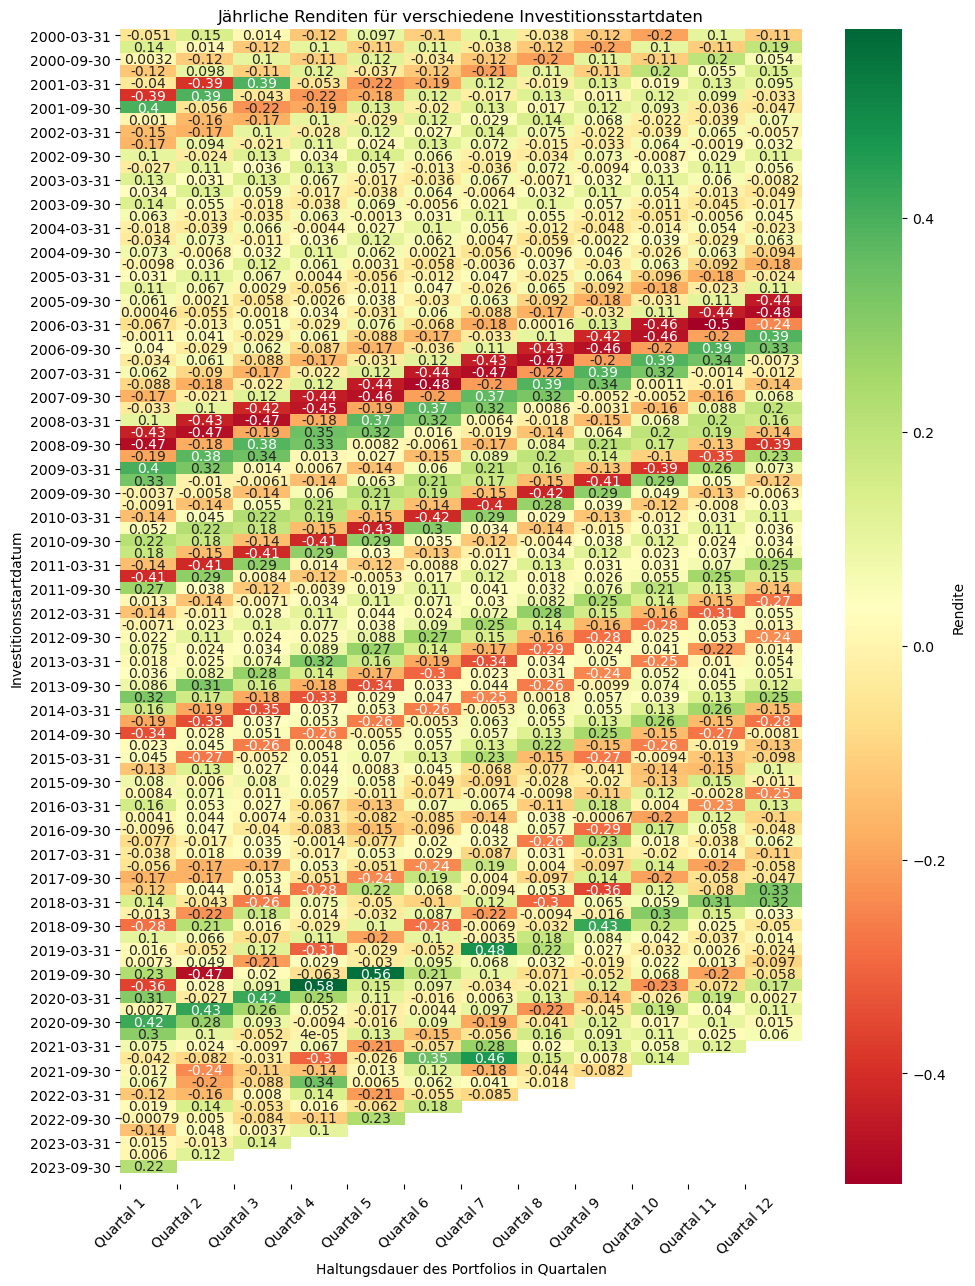

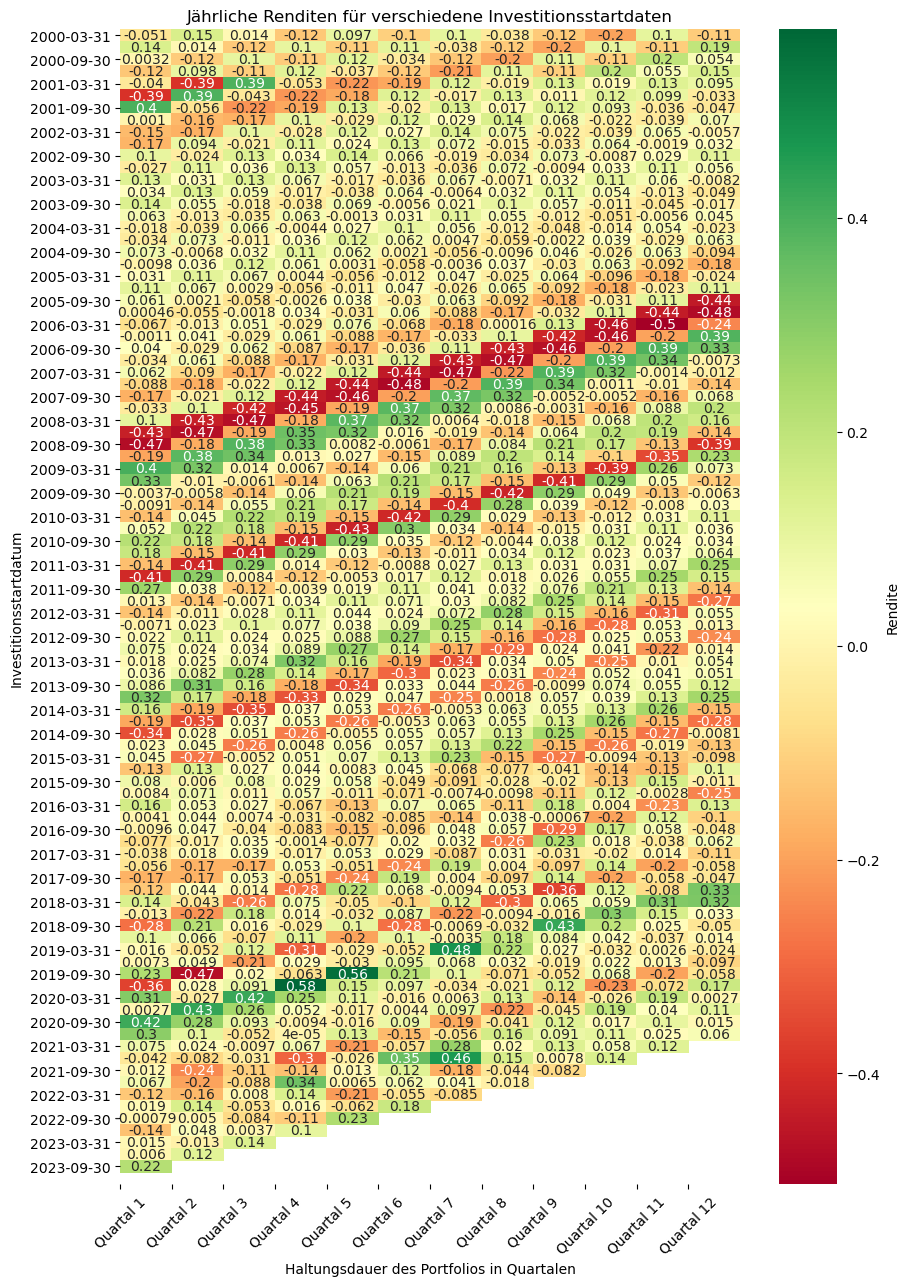

In [25]:
# Load your JSON file
with open('returns_all_year_with_mos.json', 'r') as file:
    data = json.load(file)

# Iterate over all years and periods to ensure each start date has the same length
max_periods = max(len(periods) for periods in data.values())

for start_date, periods in data.items():
    for i in range(1, max_periods + 1):
        period_key = f"Period-{i}"
        if not any(period.get(period_key) for period in periods):
            periods.append({period_key: None})

# Create DataFrame
df = pd.DataFrame(data)

# DataFrame umformen und in numerisches Format umwandeln
df_transposed = df.transpose()
df_numerical = df_transposed.applymap(lambda x: list(x.values())[0])

# Daten für die Heatmap vorbereiten
selected_periods = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Perioden auswählen (entsprechend der ersten drei Jahre)
df_selected_periods = df_numerical[df_numerical.columns.intersection(selected_periods)]

# Heatmap erstellen
plt.figure(figsize=(12, 18))
sns.heatmap(df_selected_periods, annot=True, cmap="RdYlGn", cbar_kws={'label': 'Rendite'})

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Haltungsdauer des Portfolios in Quartalen")
plt.xticks(ticks=range(len(selected_periods)), labels=[f"Quartal {i+1}" for i in selected_periods], rotation=45)

plt.ylabel("Investitionsstartdatum")
plt.title("Jährliche Renditen für verschiedene Investitionsstartdaten")

# save plot
plt.savefig('renditedreieck-all_years_mos.png')

# Plot anzeigen
plt.show()


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Load your JSON file
with open('returns_all_year_with_mos.json', 'r') as file:
    data = json.load(file)

# Iteriere über alle Jahre und Perioden, um sicherzustellen, dass jeder Startzeitpunkt die gleiche Länge hat
max_periods = max(len(periods) for periods in data.values())

for start_date, periods in data.items():
    for i in range(1, max_periods + 1):
        period_key = f"Period-{i}"
        if not any(period.get(period_key) for period in periods):
            periods.append({period_key: None})

# Erstelle DataFrame
df = pd.DataFrame(data)

# DataFrame umformen und in numerisches Format umwandeln
df_transposed = df.transpose()
df_numerical = df_transposed.applymap(lambda x: list(x.values())[0] * 100)  # Multipliziere mit 100 für Prozent

# Daten für die Heatmap vorbereiten
selected_periods = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Perioden auswählen (entsprechend der ersten drei Jahre)
df_selected_periods = df_numerical[df_numerical.columns.intersection(selected_periods)]

# Heatmap erstellen
plt.figure(figsize=(12, 12))
sns.heatmap(df_selected_periods, annot=True, cmap="RdYlGn", cbar_kws={'label': 'Rendite in Prozent'}, vmin=-100, vmax=100)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Haltungsdauer des Portfolios in Quartalen")
plt.xticks(ticks=range(len(selected_periods)), labels=[f"Quartal {i+1}" for i in selected_periods], rotation=45)

plt.ylabel("Investitionsstartdatum")
plt.title("Jährliche Renditen für verschiedene Investitionsstartdaten")

# Plot speichern
plt.savefig('renditedreieck-all_years_mos.png')

# Plot anzeigen
plt.show()


In [ ]:
# renditedreick sp 500 data

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load your JSON file
with open('sp_returns_all_years.json', 'r') as file:
    sp_data = json.load(file)

# Iterate over all years and periods to ensure each start date has the same length
max_periods = max(len(periods) for periods in sp_data.values())
print(max_periods)
for start_date, periods in sp_data.items():
    for i in range(1, max_periods + 1):
        period_key = f"Period-{i}"
        if period_key not in periods:
            periods[period_key] = None

# Create DataFrame
sp_df = pd.DataFrame(sp_data)

# DataFrame umformen und in numerisches Format umwandeln
#sp_df_transposed = sp_df.transpose()
#sp_df_numerical = sp_df_transposed.applymap(lambda x: list(x.values())[0])
sp_df_transposed = sp_df.transpose()
sp_df_numerical = sp_df_transposed.applymap(lambda x: x * 100 if x is not None else None)  # Multipliziere mit 100 für Prozent


# Daten für die Heatmap vorbereiten
sp_selected_periods = [0, 1, 2, 3] #, 4, 5, 6, 7, 8, 9, 10, 11]  # Perioden auswählen (entsprechend der ersten drei Jahre)
sp_df_selected_periods = sp_df_numerical[sp_df_numerical.columns.intersection(sp_selected_periods)]

# Heatmap erstellen
plt.figure(figsize=(8, 12))
sns.heatmap(sp_df_selected_periods, annot=True, cmap="RdYlGn", cbar_kws={'label': 'Rendite'})

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Haltungsdauer des Portfolios in Quartalen")
#plt.xticks(ticks=range(len(sp_selected_periods)), labels=[f"Quartal {i+1}" for i in sp_selected_periods], rotation=45)

plt.ylabel("Investitionsstartdatum")
plt.title("Jährliche Renditen für verschiedene Investitionsstartdaten")

# save plot
plt.savefig('renditedreieck-all_years_sp.png')

# Plot anzeigen
plt.show()




24


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x1200 with 0 Axes>

# VERGLEICH UND VISUALISIERUNGEN


In [19]:
import json
import pandas as pd

# read in sp and portfolio data


# portfolio data
with open('returns_all_year_with_mos.json', 'r') as file:
    portfolio_data = json.load(file)

print(portfolio_data)

# s&P data


# portfolio data
with open('sp_returns_all_years.json', 'r') as file:
    sp_data = json.load(file)

print(sp_data)


{'2000-03-31': [{'Period-1': -0.0509525090824515}, {'Period-2': 0.14537984140337984}, {'Period-3': 0.014238658815072322}, {'Period-4': -0.11995212468384618}, {'Period-5': 0.0971979094951769}, {'Period-6': -0.10353309821253552}, {'Period-7': 0.10473168085882302}, {'Period-8': -0.0381899173090722}, {'Period-9': -0.11585093241554592}, {'Period-10': -0.1978795690686352}, {'Period-11': 0.10400079784227724}, {'Period-12': -0.11248886729757208}, {'Period-13': 0.1899952753778496}, {'Period-14': 0.05640232389109566}, {'Period-15': 0.13717061762401453}, {'Period-16': 0.062347278057343344}, {'Period-17': -0.021108296664374863}, {'Period-18': -0.07463297666513281}, {'Period-19': 0.04137132944946035}, {'Period-20': -0.08547538618877089}, {'Period-21': 0.02911237527434862}, {'Period-22': 0.06543901204689716}, {'Period-23': 0.07001737720518185}, {'Period-24': 0.013152617995033842}], '2000-06-30': [{'Period-1': 0.14150710976474432}, {'Period-2': 0.01354852407802033}, {'Period-3': -0.11674670172759231}

In [ ]:
# restructure jsons
restructured_data_portfolios = {}

for date, periods in portfolio_data.items():
    for period_data in periods:
        period_name, value = period_data.popitem()
        if period_name not in restructured_data_portfolios:
            restructured_data_portfolios[period_name] = []
        restructured_data_portfolios[period_name].append(value)

for period, values in restructured_data_portfolios.items():
    print(f"{period}: {values}")
restructured_sp_data = {}

for date, periods in sp_data.items():
    for period, value in periods.items():
        period = period.replace(' ', '-')
        if period not in restructured_sp_data:
            restructured_sp_data[period] = []
        restructured_sp_data[period].append(value)

for period, values in restructured_sp_data.items():
    print(f"{period}: {values}")


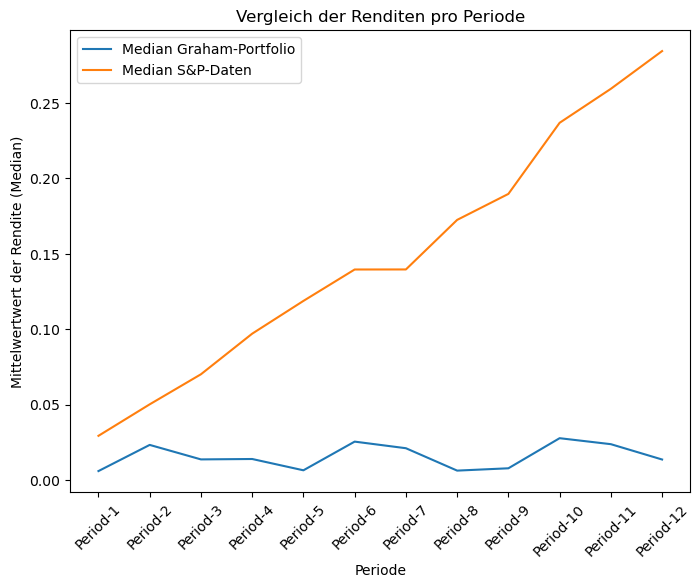

In [35]:

def plot_line_chart(data, period_name):
    periods = list(data.keys())[:12]
    medians = [np.median(data[period]) for period in periods]

    plt.plot(periods, medians, label=f'Median {period_name}')

plt.figure(figsize=(8, 6))
# Liniendiagramm für jede Periode erstellen
plot_line_chart(restructured_data_portfolios, 'Graham-Portfolio')
plot_line_chart(restructured_sp_data, 'S&P-Daten')


# Diagramm beschriften
plt.title('Vergleich der Renditen pro Periode')
plt.xlabel('Periode')
plt.xticks(rotation=45)
plt.ylabel('Mittelwertwert der Rendite (Median)')
plt.legend()

plt.savefig('portfolio_benchmark_evaluation_3_years.png')
# Diagramm anzeigen
plt.show()



# extract statistics

In [ ]:
# Berechnung von statistischen Maßen für jede Periode
statistics_data_portfolios = {}
for period, values in restructured_data_portfolios.items():
    mean_value = np.mean(values)
    median_value = np.median(values)
    std_dev_value = np.std(values)

    # Weitere statistische Maße können hinzugefügt werden

    statistics_data_portfolios[period] = {
        'Mean': mean_value,
        'Median': median_value,
        'Std Dev': std_dev_value,
        # Fügen Sie hier weitere statistische Maße hinzu
    }

# Erstellung einer DataFrame für die statistischen Daten
statistics_df_portfolios = pd.DataFrame(statistics_data_portfolios)

statistics_df_portfolios.to_csv('statistics_returns_portfolios.csv')

# Ausgabe der DataFrame
print(statistics_df_portfolios)


In [30]:
def calculate_annual_return(data):
    annual_returns = {}

    for date, periods in data.items():
        start_value = 1  # Anfangswert ist 1, da die Renditen bereits relativ sind
        end_value = 1

        for period in periods:

            for period, return_value in period.items():
                end_value *= (1 + return_value)

            # Rendite für dieses Datum berechnen
            if len(period) != 0:
                annual_returns[date] = (end_value ** (1 / len(period))) - 1

    return annual_returns

# Berechnen Sie die jährlichen Renditen
annual_returns = calculate_annual_return(portfolio_data)

# Ergebnisse ausgeben
for date, return_value in annual_returns.items():
    print(f'Datum: {date}, Jährliche Rendite: {return_value * 100:.2f}%')


In [ ]:
# Berechnung von statistischen Maßen für jede Periode
statistics_data_sp = {}
for period, values in restructured_sp_data.items():
    mean_value = np.mean(values)
    median_value = np.median(values)
    std_dev_value = np.std(values)

    # Weitere statistische Maße können hinzugefügt werden

    statistics_data_sp[period] = {
        'Mean': mean_value,
        'Median': median_value,
        'Std Dev': std_dev_value,
        # Fügen Sie hier weitere statistische Maße hinzu
    }

# Erstellung einer DataFrame für die statistischen Daten
statistics_df_sp = pd.DataFrame(statistics_data_sp)

statistics_df_sp.to_csv('statistics_returns_sp.csv')

# Ausgabe der DataFrame
print(statistics_df_sp)

In [64]:
import numpy as np

# Funktion zum Auffüllen mit NaN-Werten
def pad_with_nans(lst, target_length):
    return lst + [np.nan] * (target_length - len(lst))

# Finde maximale Länge
max_length_portfolio = max(len(lst) for lst in restructured_data_portfolios.values())
max_length_sp = max(len(lst) for lst in restructured_sp_data.values())

# Passe die Längen an
for key, value in restructured_data_portfolios.items():
    restructured_data_portfolios[key] = pad_with_nans(value, max_length_portfolio)

for key, value in restructured_sp_data.items():
    restructured_sp_data[key] = pad_with_nans(value, max_length_sp)


In [65]:
print(restructured_data_portfolios)
first_12_keys_portfolio = list(restructured_data_portfolios.keys())[:12]
portfolio_returns_3_y = {key: restructured_data_portfolios[key] for key in first_12_keys_portfolio}
print(portfolio_returns_3_y)

print(restructured_sp_data)
first_12_keys_sp = list(restructured_sp_data.keys())[:12]
sp_returns_3_y = {key: restructured_sp_data[key] for key in first_12_keys_sp}
print(sp_returns_3_y)


{'Period-1': [-0.0509525090824515, 0.14150710976474432, 0.003152875825589464, -0.12497268165578242, -0.04028652183960093, -0.39249259268168285, 0.39569536288117596, 0.001044091874207074, -0.15129783628892274, -0.16607390114033047, 0.10057444906473857, -0.02732790071051836, 0.12526479885286532, 0.03380901246412263, 0.13668534361831702, 0.06304927871822408, -0.018273875869913945, -0.03374883180872459, 0.0725487286559455, -0.009756446865477143, 0.030880878255333855, 0.11071079530148999, 0.06138619659661662, 0.00046484918616326474, -0.06665757386160556, -0.001072286489364085, 0.04025997094418073, -0.03356133859290595, 0.062137200774572326, -0.08848710933344374, -0.17112415456892635, -0.033382519297952135, 0.10418520549880367, -0.43165226891277203, -0.4703697727417202, -0.1920366394519093, 0.40060958386107093, 0.33192715858987104, -0.003742860298315771, -0.00905850337991046, -0.14498337533624836, 0.051504492463985356, 0.21616931568303294, 0.1803226815984495, -0.14496563037002091, -0.4082442

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Korrigiere die Benennung der Perioden in restructured_sp_data
restructured_sp_data_fixed = {}
for key, value in restructured_sp_data.items():
    # Extrahiere die Nummer aus dem Schlüssel ohne Leerzeichen
    period_number = int(''.join(filter(str.isdigit, key)))
    corrected_key = f'Period-{period_number}'
    restructured_sp_data_fixed[corrected_key] = value

# Erstelle ein DataFrame für beide Portfolios
df1 = pd.DataFrame(restructured_data_portfolios)
df1['Portfolio'] = 'Graham-Portfolio'

df2 = pd.DataFrame(restructured_sp_data_fixed)
df2['Portfolio'] = 'Index-Data'

# Kombiniere die beiden DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Filtere nur die ersten 12 Perioden
melted_df_filtered = melted_df[melted_df['Period'].isin([f'Period-{i}' for i in range(1, 13)])]

# Erstelle den Boxenplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Value', hue='Portfolio', data=melted_df_filtered, palette='Set2')
plt.title('Streuung der Renditen pro Periode')
plt.xlabel('Perioden')
plt.xticks(rotation=45)
plt.ylabel('Renditen')
plt.savefig('Streuung-Renditen.png')
plt.show()

NameError: name 'restructured_sp_data' is not defined

# describe data & find annual return / mean / median


In [ ]:
print(combined_df)

In [100]:
print(df1)
return_after_3_years_gn = df1["Period-12"].iloc[0]  # Assume there is only one row in the DataFrame
average_annual_return_gn = return_after_3_years_gn / 3

print("Average annual return after 3 years:", average_annual_return_gn)

    Period-1  Period-2  Period-3  Period-4  Period-5  Period-6  Period-7  \
0  -0.050953  0.145380  0.014239 -0.119952  0.097198 -0.103533  0.104732   
1   0.141507  0.013549 -0.116747  0.099609 -0.107306  0.110240 -0.038210   
2   0.003153 -0.115513  0.101658 -0.111444  0.116993 -0.034337 -0.124353   
3  -0.124973  0.098351 -0.110040  0.119593 -0.037397 -0.116200 -0.205634   
4  -0.040287 -0.393487  0.394587 -0.053408 -0.220245 -0.189998  0.123452   
..       ...       ...       ...       ...       ...       ...       ...   
90 -0.000793  0.004987 -0.083764 -0.114348  0.230949       NaN       NaN   
91 -0.140627  0.047825  0.003661  0.104960       NaN       NaN       NaN   
92  0.015133 -0.013194  0.135962       NaN       NaN       NaN       NaN   
93  0.005982  0.117476       NaN       NaN       NaN       NaN       NaN   
94  0.219891       NaN       NaN       NaN       NaN       NaN       NaN   

    Period-8  Period-9  Period-10  ...  Period-19  Period-20  Period-21  \
0  -0.038190

In [102]:

# Calculate average annual return for all rows
df1["Average_Annual_Return"] = np.power(1 + df1["Period-12"], 1/3) - 1

print("DataFrame with Average Annual Returns:")
print(df1[["Portfolio", "Period-12", "Average_Annual_Return"]])

DataFrame with Average Annual Returns:
           Portfolio  Period-12  Average_Annual_Return
0   Graham-Portfolio  -0.112489              -0.038997
1   Graham-Portfolio   0.193333               0.060687
2   Graham-Portfolio   0.054207               0.017752
3   Graham-Portfolio   0.145965               0.046463
4   Graham-Portfolio   0.095255               0.030794
..               ...        ...                    ...
90  Graham-Portfolio        NaN                    NaN
91  Graham-Portfolio        NaN                    NaN
92  Graham-Portfolio        NaN                    NaN
93  Graham-Portfolio        NaN                    NaN
94  Graham-Portfolio        NaN                    NaN

[95 rows x 3 columns]


In [103]:
print(df1["Average_Annual_Return"].mean())

-0.0018295842204690549


In [ ]:
print(df1["Period-12"].iloc[])

In [ ]:
description_df1 = df1.describe()
print(description_df1['Period-12'])

In [99]:
# df2.describe()

description_df2 = df2.describe()
print(description_df2['Period-12'])


# Berechne die CAGR für jede Zeile
df2['CAGR_12'] = (df2['Period-12'] + 1) ** (1 / len(df2)) - 1

# Durchschnittliche jährliche Rendite über alle Portfolios
average_cagr2_12 = df2['CAGR_12'].mean()

print("Durchschnittliche jährliche Rendite über alle sp-Portfolios:", average_cagr2_12)

# Berechne die CAGR für jede Zeile
df2['CAGR_24'] = (df2['Period-24'] + 1) ** (1 / len(df2)) - 1

# Durchschnittliche jährliche Rendite über alle Portfolios
average_cagr2_24 = df2['CAGR_24'].mean()

print("Durchschnittliche jährliche Rendite über alle sp-Portfolios:", average_cagr2_24)


count    84.000000
mean      0.240585
std       0.285370
min      -0.434011
25%       0.068807
50%       0.284378
75%       0.433728
max       0.901263
Name: Period-12, dtype: float64
Durchschnittliche jährliche Rendite über alle sp-Portfolios: 0.001951623016592648
Durchschnittliche jährliche Rendite über alle sp-Portfolios: 0.004001558052049474


In [75]:
import matplotlib.pyplot as plt
import numpy as np

quarter = "Period 12"

# Daten extrahieren und konvertieren
dates = list(sp_data.keys())
sp_returns = np.array([sp_data[date].get(quarter, 0) for date in dates], dtype=float)
portfolio_returns = np.array([portfolio_data[date].get(quarter, 0) for date in dates], dtype=float)

plt.figure(figsize=(14,8))


# Zeitreihenplot für S&P und Portfolio-Renditen
plt.barplot(dates, sp_returns, label='S&P 500')
plt.barplot(dates, portfolio_returns, label='Portfolio')

plt.xlabel('Investitionsdatum')
plt.ylabel('Rendite')
plt.title(f'3-Jahres-Rendite')
plt.xticks(rotation=90)
plt.legend()

plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\3yearbenchmark.png')

plt.show()

AttributeError: 'list' object has no attribute 'get'

{'Period 1': 0.0026034819164278897, 'Period 2': 0.005464136612701268, 'Period 3': 0.009979105774415074, 'Period 4': -0.0007173516918363098, 'Period 5': 4.27082387663799e-05, 'Period 6': 0.0015221292194300506, 'Period 7': 0.0037858553140271392, 'Period 8': 0.003080294494293023, 'Period 9': 0.005757862213532144, 'Period 10': 0.007273029929561561, 'Period 11': 0.007122392809836703, 'Period 12': 0.009052723228306327, 'Period 13': -0.0031887490338880593, 'Period 14': -0.001766305541030321, 'Period 15': 0.002788054053183735, 'Period 16': -0.004842924822738392, 'Period 17': 0.00016657757234470798, 'Period 18': 0.003565084754486794, 'Period 19': -0.004026802756237904, 'Period 20': 0.0038581388919100013, 'Period 21': -0.0005985796612900318, 'Period 22': -0.0031260043535606095, 'Period 23': -0.0017776311635031052, 'Period 24': -0.0009744418308348988}


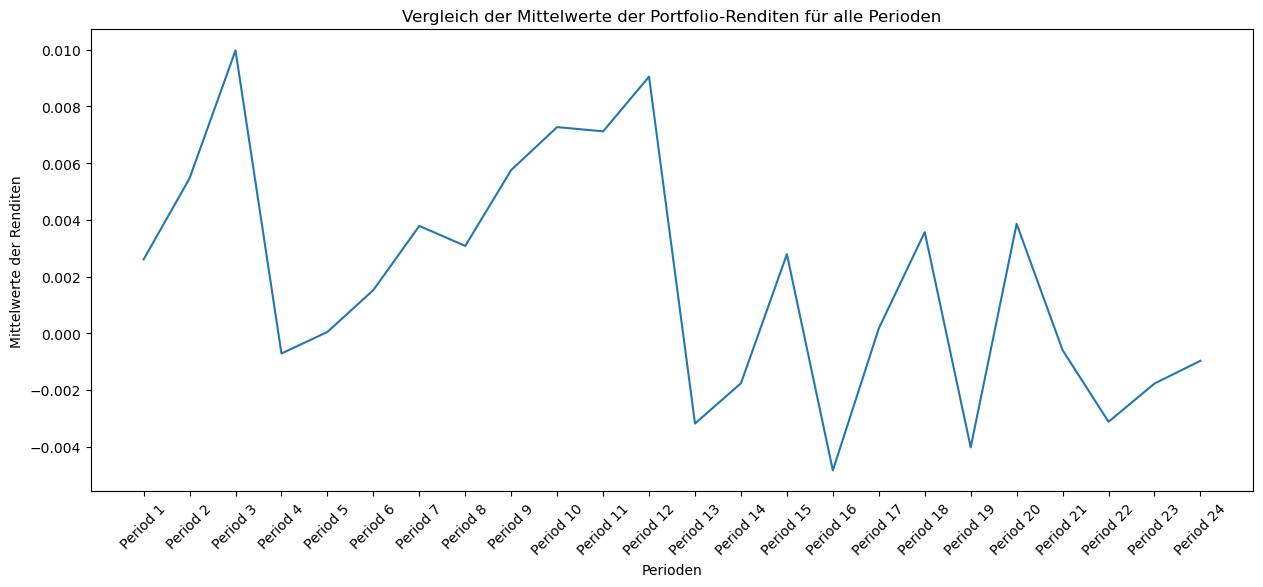

"# Extrahiere Renditen für jedes Datum und jede Periode\nportfolio_returns_by_period = {period: [portfolio_data[date].get(period, 0) for date in dates] for period in all_periods}\n\n\n# Erstelle einen Boxplot für jede Periode\nplt.figure(figsize=(15, 6))\nplt.boxplot(portfolio_returns_by_period.values(), labels=all_periods)\nplt.xlabel('Perioden')\np\nplt.ylabel('Renditen')\nplt.title('Vergleich der Portfolio-Renditen für alle Perioden')\nplt.show()"

In [14]:
import matplotlib.pyplot as plt

# COMPARISON

# Sortiere die Perioden numerisch
sorted_periods = sorted(set(period for date in portfolio_data.keys() for period in portfolio_data[date]), key=lambda x: int(x.split()[-1]))

# Sortiere die Daten nach den sortierten Perioden
sorted_portfolio_data = {date: {period: portfolio_data[date].get(period, 0) for period in sorted_periods} for date in portfolio_data.keys()}

# Mittelwerte nach Perioden berechnen
mean_returns_by_period = {period: sum(sorted_portfolio_data[date][period] for date in sorted_portfolio_data.keys()) / len(sorted_portfolio_data) for period in sorted_periods}
print(mean_returns_by_period)

plt.figure(figsize=(15, 6))  # Hier werden die Größen als Tupel übergeben, nicht als separate Argumente
plt.plot(mean_returns_by_period.values())
plt.xticks(range(len(mean_returns_by_period)), mean_returns_by_period.keys())  # Füge die x-Achsenticks hinzu
plt.xlabel('Perioden')
plt.xticks(rotation=45)
plt.ylabel('Mittelwerte der Renditen')
plt.title('Vergleich der Mittelwerte der Portfolio-Renditen für alle Perioden')
plt.show()

In [76]:
import matplotlib.pyplot as plt

# Sortiere die Perioden numerisch
sorted_periods_portfolio = sorted(set(period for date in portfolio_data.keys() for period in portfolio_data[date]), key=lambda x: int(x.split()[-1]))
sorted_periods_sp = sorted(set(period for date in sp_data.keys() for period in sp_data[date]), key=lambda x: int(x.split()[-1]))


# Sortiere die Daten nach den sortierten Perioden für beide Portfolios
sorted_portfolio_data_portfolio = {date: {period: portfolio_data[date].get(period, 0) for period in sorted_periods_portfolio} for date in portfolio_data.keys()}

sorted_portfolio_data_sp = {date: {period: sp_data[date].get(period, 0) for period in sorted_periods_sp} for date in sp_data.keys()}

# Mittelwerte nach Perioden berechnen für beide Portfolios
mean_returns_by_period_portfolio = {period: sum(sorted_portfolio_data_portfolio[date][period] for date in sorted_portfolio_data_portfolio.keys()) / len(sorted_portfolio_data_portfolio) for period in sorted_periods_portfolio}
mean_returns_by_period_sp = {period: sum(sorted_portfolio_data_sp[date][period] for date in sorted_portfolio_data_sp.keys()) / len(sorted_portfolio_data_sp) for period in sorted_periods_sp}

# Plot
plt.figure(figsize=(15, 6))

plt.plot(mean_returns_by_period_portfolio.values(), label='Portfolio Data')
plt.plot(mean_returns_by_period_sp.values(), label='S&P-Index Data')

plt.xticks(range(len(mean_returns_by_period_portfolio)), mean_returns_by_period_portfolio.keys())
plt.xlabel('Quartale')
plt.xticks(rotation=45)
plt.ylabel('Mittelwerte der Renditen')
plt.title('Vergleich der durchschnittlichen Entwicklung der Portfolio-Renditen über die Gesamthaltungsdauer')
plt.legend()

plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\durchschnittliche_rendite_pro_periode.png')
plt.show()


TypeError: unhashable type: 'dict'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sortiere die Perioden numerisch
sorted_periods_portfolio = sorted(set(period for date in portfolio_data.keys() for period in portfolio_data[date]), key=lambda x: int(x.split()[-1]))
print(sorted_periods_portfolio)

sorted_periods_sp = sorted(set(period for date in sp_data.keys() for period in sp_data[date]), key=lambda x: int(x.split()[-1]))
print(sorted_periods_sp)

# Sortiere die Daten nach den sortierten Perioden für beide Portfolios
sorted_portfolio_data_portfolio = {date: {period: portfolio_data[date].get(period, 0) for period in sorted_periods_portfolio} for date in portfolio_data.keys()}
print(sorted_portfolio_data_portfolio)
sorted_portfolio_data_sp = {date: {period: sp_data[date].get(period, 0) for period in sorted_periods_sp} for date in sp_data.keys()}
print(sorted_portfolio_data_sp)

# Median nach Perioden berechnen für beide Portfolios
median_returns_by_period_portfolio = {period: np.median([sorted_portfolio_data_portfolio[date][period] for date in sorted_portfolio_data_portfolio.keys()]) for period in sorted_periods_portfolio}
median_returns_by_period_sp = {period: np.median([sorted_portfolio_data_sp[date][period] for date in sorted_portfolio_data_sp.keys()]) for period in sorted_periods_sp}
print(median_returns_by_period_portfolio)
print(median_returns_by_period_sp)

# Plot
plt.figure(figsize=(15, 6))

plt.plot(median_returns_by_period_portfolio.values(), label='Portfolio Data')
plt.plot(median_returns_by_period_sp.values(), label='S&P-Index Data')

plt.xticks(range(len(median_returns_by_period_portfolio)), median_returns_by_period_portfolio.keys())
plt.xlabel('Quartale')
plt.xticks(rotation=45)
plt.ylabel('Mediane der Renditen')
plt.title('Vergleich der durchschnittlichen Entwicklung der Portfolio-Renditen über die Gesamthaltungsdauer (Median)')
plt.legend()

plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\median_rendite_pro_periode.png')
plt.show()

